### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
pio.renderers.default='notebook'

### Problems

Use the prompts below to get started with your data analysis.  



1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9277,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,26,Unmarried partner,0,High School Graduate,Healthcare Support,$25000 - $37499,NaN,less1,less1,1~3,1~3,1~3,1,0,0,0,1,1
12616,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,0,Bachelors degree,Unemployed,$37500 - $49999,NaN,never,4~8,1~3,1~3,less1,1,0,0,0,1,1
2589,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Single,0,Some college - no degree,Office & Administrative Support,$12500 - $24999,NaN,1~3,1~3,less1,1~3,less1,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.  
   
   - One thing we note is that most columns are categorical.  For instance, even temperature only has 3 temperature values.  So these are clearly categorical.  This means that our visualizations will probably be bar plots, histograms, heatmaps, box/violin plots 
   
   - Let us start by dropping duplicates and then running the info.() method

In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

Next we will calculate the percentage of nulls 

In [6]:
#helper function to compute the number and ratio of nulls for a given column
def print_null_ratio(df, col):
    sum_count = df[col].isnull().sum()
    print(f'{col} has {sum_count} nulls or {round((sum_count/df.shape[0])*100,2)} % nulls')

#print null ratios and counts
print_null_ratio(df, 'car')
print_null_ratio(df, 'Bar')
print_null_ratio(df, 'CoffeeHouse')
print_null_ratio(df, 'CarryAway')
print_null_ratio(df, 'RestaurantLessThan20')
print_null_ratio(df, 'Restaurant20To50')

car has 12502 nulls or 99.14 % nulls
Bar has 107 nulls or 0.85 % nulls
CoffeeHouse has 217 nulls or 1.72 % nulls
CarryAway has 150 nulls or 1.19 % nulls
RestaurantLessThan20 has 129 nulls or 1.02 % nulls
Restaurant20To50 has 189 nulls or 1.5 % nulls


3. Decide what to do about your missing data -- drop, replace, other...

    a. car has 99% nulls.  It makes sense to drop this column
    b. all other columns only have 1-2% nulls so we will delete them as it may not be worth introducing new bias

In [7]:
#drop car column
df.drop(['car'],axis=1, inplace=True)

#drop other rows with nulls
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-nul

#### Before we start the analysis, let's write a function that will give us the values in each column along with the frequency

* The list of values will be useful when writing queries and to be able to order values for plots 
* The counts are just a quick way to get a sense of the data.  For instance, we note that we have substantially more data for drivers who are:  
    * Driving to No Urgent Place
    * Driving Alone
    * Driving under Sunny Weather
    * Driving at 80 degree temperature
    * Receiving a Coffee House Coupon
    * Married and Single
    * Have Some college or a Bachelors degree

In [9]:
#Helper function to show all values in each column of the dataframe
def print_distribution(df, direction=False):
    for column in df.columns:
        print(df.groupby(column)[[column]].value_counts().sort_values(ascending=direction))
        print('---------')
        
print_distribution(df)

destination
No Urgent Place    5953
Home               3078
Work               2976
dtype: int64
---------
passanger
Alone        6914
Friend(s)    3142
Partner      1018
Kid(s)        933
dtype: int64
---------
weather
Sunny    9545
Snowy    1323
Rainy    1139
dtype: int64
---------
temperature
80    6171
55    3652
30    2184
dtype: int64
---------
time
6PM     3068
7AM     2976
10AM    2154
2PM     1913
10PM    1896
dtype: int64
---------
coupon
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
dtype: int64
---------
expiration
1d    6702
2h    5305
dtype: int64
---------
gender
Female    6158
Male      5849
dtype: int64
---------
age
21         2526
26         2388
31         1906
50plus     1725
36         1251
41         1061
46          648
below21     502
dtype: int64
---------
maritalStatus
Married partner      4799
Single               4554
Unmarried partner    2047
Divorced   

#### Also, before we start the analysis, can we combine some columns ?
1. direction_same and direction_opp sound mutually exclusive. If we can prove that they are, we should be able to combine them. 

2. By the same token, can we combine toCoupon_GEQ5min/toCoupon_GEQ15min/toCoupon_GEQ25min?  
    - Are there any rows with toCoupon_GEQ25min=1 but toCoupon_GEQ15min=0 or toCoupon_GEQ5min=0?
    - Are there any rows with toCoupon_GEQ15min=1 but toCoupon_GEQ5min=0? 
    - If not we should be able to combine colums as follows (without losing data) 

|5 |15 |25 |Result |
|--|---|---|-------|
|1 |0  |0  |5      |
|1 |1  |0  |15     |
|1 |1  |1  |25     | 


In [10]:
# 1. Mutual Exclusivity test for direction_same and direction_opp
direction_mutually_exlusive = df.query( '(direction_same == 1) & (direction_opp == 1) | (direction_same == 0) & (direction_opp == 0)').empty


#2.
 # - Are there any rows with toCoupon_GEQ25min=1 but toCoupon_GEQ15min=0 or toCoupon_GEQ5min=0?
 # - Are there any rows with toCoupon_GEQ15min=1 but toCoupon_GEQ5min=0?
toCouponTest1 = df.query("toCoupon_GEQ25min==1 and (toCoupon_GEQ15min==0 or toCoupon_GEQ5min==0)").empty
toCouponTest2 = df.query("toCoupon_GEQ15min==1 and toCoupon_GEQ5min==0").empty

print(f"toCouponTest1: {toCouponTest1}")
print(f"toCouponTest2: {toCouponTest2}")
print(f"directionTest: {direction_mutually_exlusive}")

toCouponTest1: True
toCouponTest2: True
directionTest: True


#### Combine columns
Since the tests above passed, we will combine the columns in the questions above

In [11]:
# Define the mappings
venueDistanceMap = {
    (0, 0, 0): 'Invalid'
    ,(1, 0, 0): '5 mins'
    ,(1, 1, 0): '15 mins'
    ,(1, 1, 1): '25 mins'
}

directionMap = {
    (1,0): 'Same'
    ,(0,1): 'Opposite'
}

df['venueDistance']=df[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].apply(lambda row: venueDistanceMap[tuple(row)], axis=1)
df['direction']=df[['direction_same', 'direction_opp']].apply(lambda row: directionMap[tuple(row)], axis=1)
df.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],axis=1, inplace=True)
df.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,venueDistance,direction
8357,Home,Alone,Snowy,30,10PM,Restaurant(20-50),2h,Male,26,Unmarried partner,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,5 mins,Opposite
12244,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,50plus,Married partner,1,Some college - no degree,Business & Financial,$100000 or More,less1,1~3,4~8,1~3,1~3,0,15 mins,Opposite
9381,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,21,Single,0,Bachelors degree,Unemployed,$100000 or More,4~8,less1,1~3,4~8,1~3,1,15 mins,Opposite


#### Define ordered lists and labels of categorical variables
These may be needed for plotting variables in order as well as just as a reference of values. 

In [131]:
#Define columns as categorical and define order for each column in case needed for plotting

income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
df['income'] = pd.Categorical(df['income'], categories=income_order, ordered=True)

education_order=['Some High School', 'High School Graduate', 'Associates degree',
                 'Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

time_order=['7AM', '10AM', '2PM', '6PM', '10PM']
df['time'] = pd.Categorical(df['time'], categories=time_order, ordered=True)

expiration_order=['2h', '1d']
df['expiration'] = pd.Categorical(df['expiration'], categories=expiration_order, ordered=True)

distance_order=['5 mins', '15 mins', '25 mins']
df['venueDistance'] = pd.Categorical(df['venueDistance'], categories=distance_order, ordered=True)

visit_freq_order= ['never', 'less1', '1~3', '4~8', 'gt8']
df['RestaurantLessThan20'] = pd.Categorical(df['RestaurantLessThan20'], categories=visit_freq_order, ordered=True)
df['Restaurant20To50'] = pd.Categorical(df['Restaurant20To50'], categories=visit_freq_order, ordered=True)
df['CoffeeHouse'] = pd.Categorical(df['CoffeeHouse'], categories=visit_freq_order, ordered=True)

temperature_order=[30, 55, 80]
df['temperature'] = pd.Categorical(df['temperature'], categories=temperature_order, ordered=True)

weather_list=['Sunny', 'Rainy', 'Snowy']
df['weather'] = pd.Categorical(df['weather'], categories=weather_list, ordered=False)

age_order=['Below 21', '21', '26', '31', '36', '41', '46', 'Above 50']
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

4. What proportion of the total observations chose to accept the coupon? 

In [339]:
print(f"The proportion of total observations who chose to accept the coupon is: {100*df['Y'].mean():.2f}%") 

The proportion of total observations who chose to accept the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.
#### Below is a barplot as well as a countplot side by side 

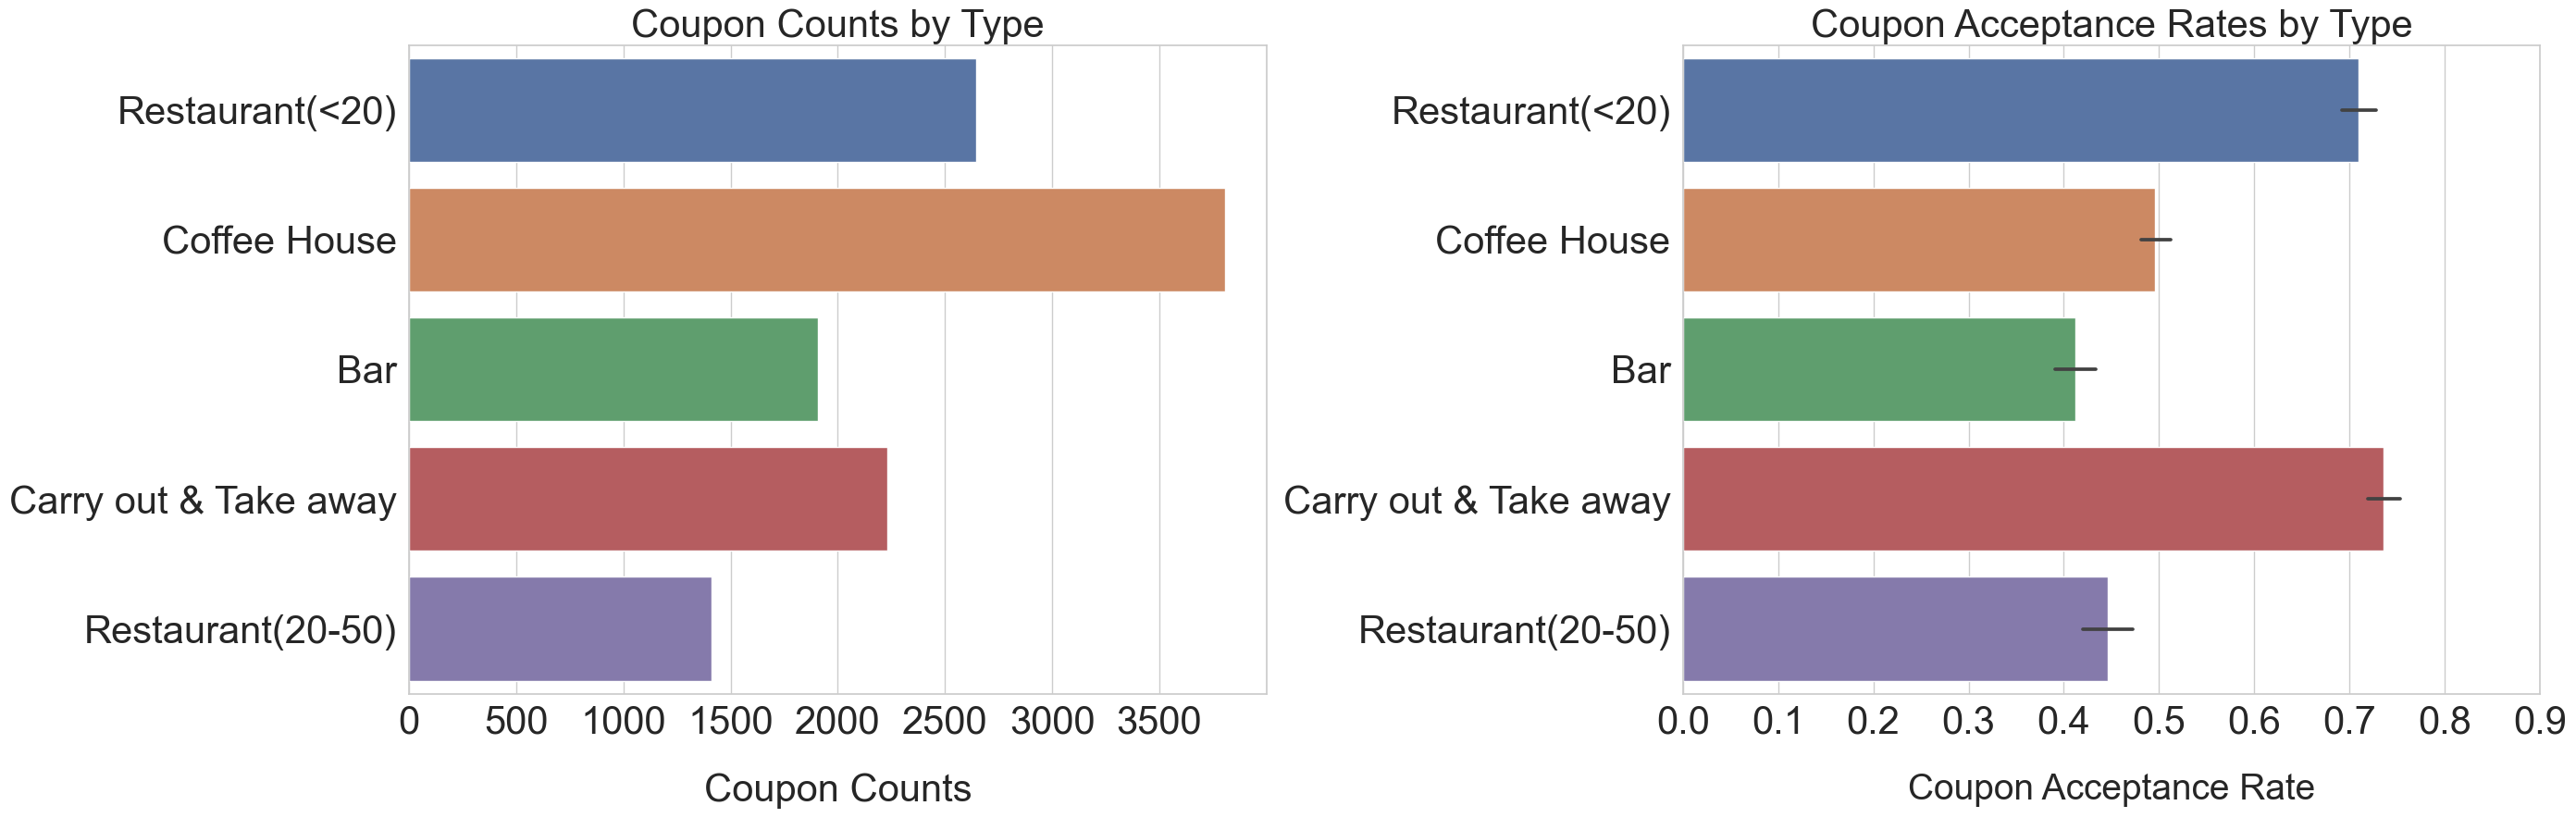

,coupon,Coupon Acceptance Rate
1,Carry out & Take away,0.735781
4,Restaurant(<20),0.709751
2,Coffee House,0.495668
3,Restaurant(20-50),0.446568
0,Bar,0.411857


In [14]:
#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(28,9))

# Count plot
axc = plt.subplot(1,2,1)
sns.countplot(data=df, y="coupon")
plt.title("Coupon Counts by Type", fontsize=30)
plt.ylabel('', fontsize=30) #removed label to reduce clutter
plt.xlabel('Coupon Counts',fontsize=30, labelpad=25)
axc.set_xticks(np.arange(0,4000,500))
plt.tick_params(axis='both', labelsize=30)

# Bar plot
axb = plt.subplot(1,2,2)
sns.barplot(data=df, y="coupon", x="Y")
plt.title("Coupon Acceptance Rates by Type", fontsize=30)
plt.ylabel('', fontsize=30)  #removed label to reduce clutter
plt.xlabel('Coupon Acceptance Rate', fontsize=28, labelpad=25)
axb.set_xticks(np.arange(0,1,0.1))
plt.tick_params(axis='both', labelsize=30)

plt.tight_layout()
plt.show()

#Show Coupon Acceptance Rate in a Dataframe as well
df_mean_acceptance = df.groupby('coupon')['Y'].mean().reset_index().sort_values(by='Y', ascending=False)
df_mean_acceptance.rename(columns={'Y': 'Coupon Acceptance Rate'})

#### The  plotly plot below summarizes both plots above while giving us exact percentages

6. Use a histogram to visualize the temperature column.

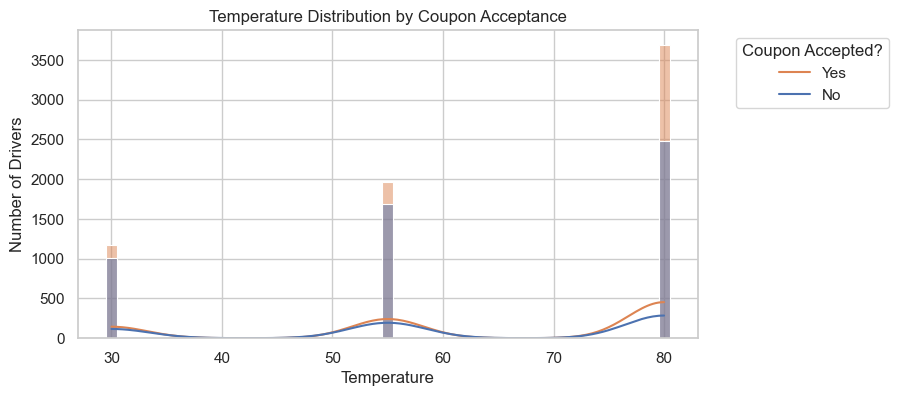

In [15]:
#Again we will do this by also showing coupon acceptance 

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="temperature", hue="Y", kde=True, binwidth=25)
plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Number of Drivers')
plt.legend(title='Coupon Accepted?', labels=['Yes', 'No'], bbox_to_anchor=(1.05, 1), loc='upper left')

We note that the most coupons are distributed to drivers when temperatures are at 80 and that those coupons have the highest acceptance rate.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [345]:
df_bar= df.copy().query("coupon=='Bar'")
df_bar.sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,venueDistance,direction
11933,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,0,15 mins,Opposite
12610,Work,Alone,Snowy,30,7AM,Bar,1d,Female,NaN,Divorced,1,Some college - no degree,Personal Care & Service,$12500 - $24999,never,less1,1~3,1~3,less1,0,25 mins,Opposite
11813,Home,Partner,Sunny,30,10PM,Bar,2h,Male,36,Married partner,1,Associates degree,Computer & Mathematical,$100000 or More,never,less1,4~8,1~3,less1,0,25 mins,Opposite


2. What proportion of bar coupons were accepted?

**Since we are investigating Bar coupons in this section, all answers will be answers assuming that/given that the driver received the Bar coupon. We will not necessarily repeat this disclaimer throughout this section.**


In [346]:
print(f"The proportion of bar coupons that were accepted is : {100*df_bar['Y'].mean():.2f}%")

The proportion of bar coupons that were accepted is : 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [347]:
def compare_acceptance_rates(df1, df2, df1_descr, df2_descr):
    """
    This function takes two subsets of our dataframe and computes the means of 'Y' for each group which is the
    same thing as the acceptance rate. 
    
    It then outputs: 
       - The description of the first group along with its acceptance rate
       - The description of the second group along with its acceptance rate
       - It then computes the ratio of the acceptance rates between both groups (numerator is the dominant group)

    Parameters: 
     - df1: first subset of our dataframe (group1)
     - df2: second subset of our dataframe (group2)
     - df1_descr: description of first subset
     - df2_descr: description of second subset
     
     Returns: None
    """
    
    #compute group means
    group1_AR=df1['Y'].mean()
    group2_AR=df2['Y'].mean()
    
    #print acceptance rate for each group and for the ratio of the largest to the smallest
    print(f"\nThe acceptance rate for {df1_descr} is {100*group1_AR:.2f}%")
    print(f"The acceptance rate for {df2_descr} is {100*group2_AR:.2f}%")
    if group1_AR > group2_AR:
        print(f"\n{df1_descr} are {group1_AR/group2_AR:.2f} more likely to accept the coupon than {df2_descr}")
    else:
        print(f"\n{df2_descr} are {group2_AR/group1_AR:.2f} more likely to accept the coupon than {df1_descr}")
 

In [349]:
#Description of both groups
group1_descr = 'drivers who went to a bar 3 or fewer times a month'
group2_descr = 'drivers who went to a bar more than 3 times a months'

#List of values for 3 visits or less
three_times_or_fewer = ['never', 'less1', '1~3']

#Query first group using list above.  Define second group as having the opposite indices
group1 = df_bar.query("Bar in @three_times_or_fewer")
group2 = df_bar[~df_bar.index.isin(group1.index)]

#Output results
compare_acceptance_rates(group1, group2, group1_descr, group2_descr)


The acceptance rate for drivers who went to a bar 3 or fewer times a month is 37.24%
The acceptance rate for drivers who went to a bar more than 3 times a months is 76.17%

drivers who went to a bar more than 3 times a months are 2.05 more likely to accept the coupon than drivers who went to a bar 3 or fewer times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [350]:
# We are comparing acceptance rates for these two populations:
#group1: drivers who go to a bar more than once a month and age > 25 
group1_descr = 'Drivers who go to a bar more than once a month and age > 25'    
group1 = df_bar.query("(Bar in ['1~3','4~8', 'gt8']) and (age in ['26','31', '36', '41','46','50plus'])")

#group2: All others is the same as saying the ones NOT in group 1
group2_descr= 'all others'
group2 = df_bar[~df_bar.index.isin(group1.index)]

compare_acceptance_rates(group1, group2, group1_descr, group2_descr)


The acceptance rate for Drivers who go to a bar more than once a month and age > 25 is 69.41%
The acceptance rate for all others is 35.06%

Drivers who go to a bar more than once a month and age > 25 are 1.98 more likely to accept the coupon than all others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [352]:
# We are comparing acceptance rates for these two populations:
#group1:  drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
group1_descr = 'Drivers who go to bars more than once a month and had passengers that \
were not a kid and had occupations other than farming, fishing, or forestry'
group1 = df_bar.query("Bar in ['1~3','4~8', 'gt8'] and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")

#group2: All others is the same as saying the ones NOT in group 1
group2_descr = 'all others'
group2 = df_bar[~df_bar.index.isin(group1.index)]

compare_acceptance_rates(group1, group2, group1_descr, group2_descr)


The acceptance rate for Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 70.94%
The acceptance rate for all others is 29.72%

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are 2.39 more likely to accept the coupon than all others


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### For each group we will compare that group's acceptance rate against all others.  

In [22]:
#group1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1_descr = 'drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed'
group1 = df_bar.query("Bar in ['1~3','4~8', 'gt8'] and passanger != 'Kid(s)' and maritalStatus != 'Widowed' ")

#group2: All others is the same as saying the ones NOT in group 1
group2_descr = 'all others'
group2 = df_bar[~df_bar.index.isin(group1.index)]

compare_acceptance_rates(group1, group2, group1_descr, group2_descr)
print("-----------------------------------------------------------------------------------------------------")

#group3: drivers who go to bars more than once a month and are under the age of 30
group3_descr = 'drivers who go to bars more than once a month and are under the age of 30'
group3 = df_bar.query("Bar in ['1~3','4~8', 'gt8'] and age in ['below21', '21', '26']")

#group4: All others is the same as saying the ones NOT in group 3
group4_descr = 'all others'
group4 = df_bar[~df_bar.index.isin(group3.index)]

compare_acceptance_rates(group3, group4, group3_descr, group4_descr)
print("-----------------------------------------------------------------------------------------------------")

#group 5: drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
group5_descr = 'drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.'
group5 = df_bar.query("RestaurantLessThan20 in ['4~8', 'gt8'] and income in \
['Less than $12500', '$25000 - $37499', '$12500 - $24999', '$37500 - $49999']")

#group6: All others is the same as saying the ones NOT in group 5
group6_descr = 'all others'
group6 = df_bar[~df_bar.index.isin(group5.index)]

compare_acceptance_rates(group5, group6, group5_descr, group6_descr)


The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 70.94%
The acceptance rate for all others is 29.72%

drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed are 2.39 more likely to accept the coupon than all others
-----------------------------------------------------------------------------------------------------

The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 72.96%
The acceptance rate for all others is 34.82%

drivers who go to bars more than once a month and are under the age of 30 are 2.10 more likely to accept the coupon than all others
-----------------------------------------------------------------------------------------------------

The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. is 45.65%
The acceptance rate for all others i

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Let us summarize the acceptance rates:
- The acceptance rate for drivers who went to a bar: 
    - overall is 41.19%
    - 3 times in 1 month is: 76.17% or 2.05 times more than those when 3 times or fewer (37.24%)
    - more than once a month and age > 25 is 69.41% or 1.98 times more than all others (35.06%)

    - more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 70.94% or 2.39 times more than all others (29.72%)

    - more than once a month, had passengers that were not a kid, and were not widowed is 70.93% or 2.39 times more than all others (29.72%)
    - more than once a month and are under the age of 30 is 72.96% or 2.10 more than all others (34.82%)
    - and also go to cheap restaurants more than 4 times a month with income less than 50K. is 45.65% or 1.13 times more likely to accept the coupon than all others (40.24%)

#### Hypothesis: 
We see a high acceptance rate amongst drivers who have characteristics of being younger and single.  For instance, younger people typically frequent cheap restaurants, go out a lot to both bars and restaurants, have lower incomes and are less likely to have kids.  Therefore I hypothesize that acceptance rates are higher for drivers who are young and single.  Here are some plots to see if we can confirm the hypothesis. 

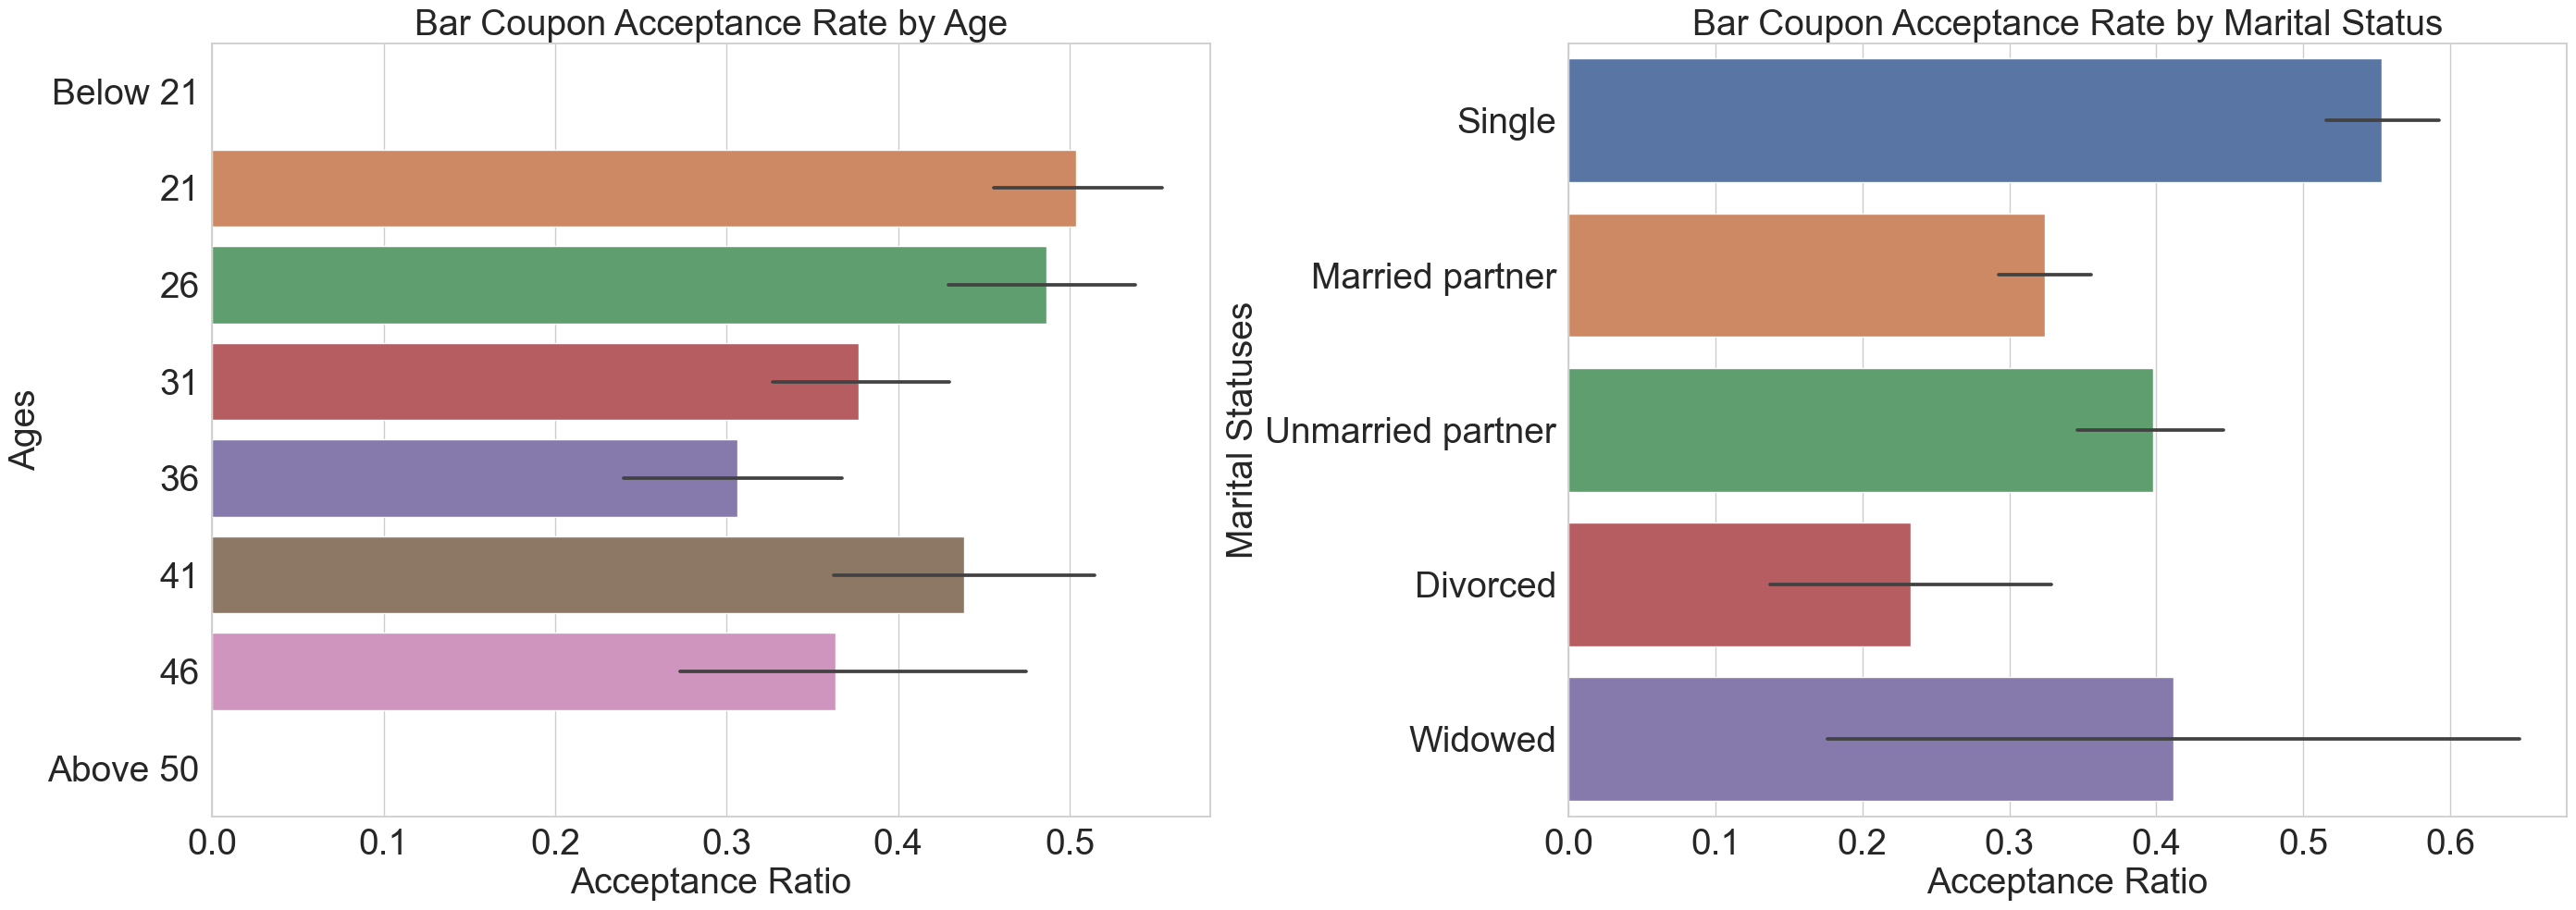

In [23]:
#Define subplots
fig, axs = plt.subplots(ncols=2, figsize=(28,10))

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#Bar Plot 
plt.subplot(1,2,1)
sns.barplot(data=df_bar, y="age", x="Y", order=age_order)
plt.title("Bar Coupon Acceptance Rate by Age", fontsize=28)
plt.ylabel('Ages', fontsize=28)
plt.xlabel('Acceptance Ratio',fontsize=28)
plt.tick_params(axis='both', labelsize=28)

# Bar Plot
plt.subplot(1,2,2)
sns.barplot(data=df_bar, y="maritalStatus", x="Y")
plt.title("Bar Coupon Acceptance Rate by Marital Status", fontsize=28)
plt.ylabel('Marital Statuses', fontsize=28)
plt.xlabel('Acceptance Ratio', fontsize=28)
plt.tick_params(axis='both', labelsize=28)

plt.tight_layout()
plt.show()


#### Conclusion:
The hypothesis is confirmed:  Highest acceptance rates are for ages 21-30 and for singles. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  
I will explore the **Coffee House** coupon for 3 reasons: 
- Most of the coupons given are for coffee, therefore we have the most data for this category.  
- We already know that the acceptance rate for Coffee Coupons is right around 50% which is interesting
- I love coffee! 

**Since we are investigating Coffee House coupons in this section, all answers will be answers assuming that/given that the driver received the Coffee House coupon. We will not necessarily repeat this disclaimer throughout this section.**

### Problem Statement: 
 - List distinctions between customers who accept a Coffee House coupon versus those who do not in terms of:
   - User attributes  
   - Contextual attributes 
   - Coupon attributes

In [50]:
df_coffee= df.copy().query("coupon=='Coffee House'")
df_coffee.sample(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y,venueDistance,direction
8167,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,1~3,4~8,4~8,1~3,less1,1,15 mins,Opposite
7839,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,31,Married partner,0,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,1,5 mins,Opposite


#### Question 1:  
 - For what combination of contextual attributes did drivers have the highest acceptance rate?
 - For what combination of contextual attributes did drivers have the lowest acceptance rate?
 - What is the ratio between both groups?

In [134]:
#Define list of contextual attributes
contextual_attributes = ['destination', 'time','passanger','venueDistance', 'direction','weather', 'temperature']

#Aggregate by all contextual attributes
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_context_attribs_acceptance = (df_coffee.groupby(contextual_attributes)['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_context_attribs_acceptance

,destination,time,passanger,venueDistance,direction,weather,temperature,acceptance_rate,coupon_count
1408,No Urgent Place,10AM,Kid(s),5 mins,Opposite,Rainy,55,1.000000,5
1369,No Urgent Place,10AM,Friend(s),15 mins,Opposite,Sunny,55,0.863636,22
1352,No Urgent Place,10AM,Friend(s),5 mins,Opposite,Sunny,80,0.722543,173
1998,No Urgent Place,10PM,Friend(s),5 mins,Opposite,Sunny,30,0.714286,14
2175,Work,7AM,Alone,5 mins,Same,Snowy,30,0.712500,80
2018,No Urgent Place,10PM,Friend(s),15 mins,Opposite,Sunny,80,0.682353,85
1298,No Urgent Place,10AM,Alone,5 mins,Opposite,Sunny,80,0.642857,28
676,Home,6PM,Alone,15 mins,Same,Sunny,55,0.642857,14
1406,No Urgent Place,10AM,Kid(s),5 mins,Opposite,Sunny,80,0.642857,28
1568,No Urgent Place,2PM,Friend(s),5 mins,Opposite,Sunny,80,0.640000,75


In [363]:
print(f"Highest acceptance rate: {100*df_context_attribs_acceptance['acceptance_rate'].iloc[0]:.2f}%")
print(f"Lowest acceptance rate: {100*df_context_attribs_acceptance['acceptance_rate'].iloc[-1]:.2f}%")

Highest acceptance rate: 100.00%
Lowest acceptance rate: 17.50%


In [364]:
#Helper function to divide the ratio of largest to smallest 
#Intended to be used on the aggregate of a dataframe column
def ratio_of_largest_to_smallest(s):
    largest = max(s)
    smallest = min(s) 
    return largest / smallest if smallest > 0 else f'undefined since smallest ratio is 0'

print(f"The ratio between both groups is "
      f"{df_context_attribs_acceptance['acceptance_rate'].agg(ratio_of_largest_to_smallest):.2f}")

The ratio between both groups is 5.71


#### Answer 1
- Drivers going No Urgent Place at 10AM with kids when the venue is only 5 mins away in the opposite direction and it is 55 degrees and rainy outside had the highest acceptance rate (100%)
- Drivers going home at 10PM alone when the venue is 15 mins away in the opposite direction and it is 30 degrees and snow outside had the lowest acceptance rate (17.5%)
- The ratio between the group with the highest acceptance rate to the group with the lowest acceptance rate is 5.71

#### Question 2
- For what combination of destination and time did drivers have the highest acceptance rate?
- For what combination of destination and time did drivers have the lowest acceptance rate?
- What is the ratio between both groups?

Text(0, 0.5, 'Count')

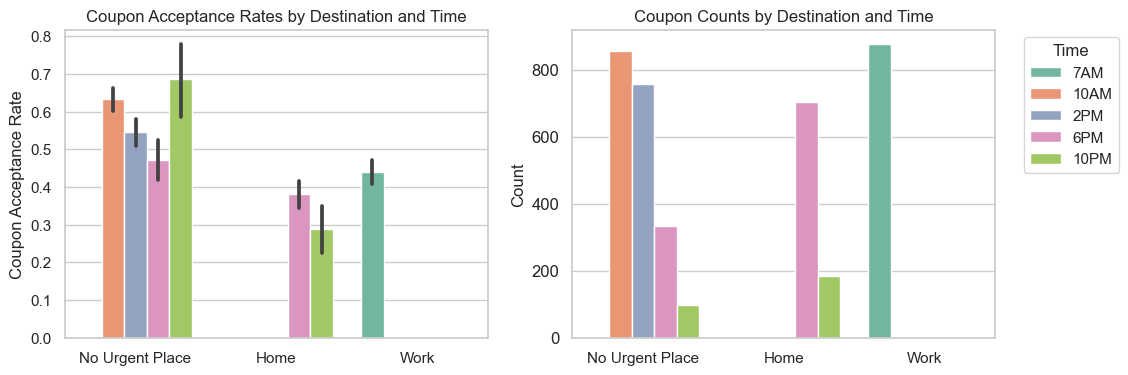

In [135]:
#Set Figure size
plt.figure(figsize=(12, 4))  

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#First subplot on row 1 (Countplot)
plt.subplot(1,2,1)
sns.barplot(data=df_coffee, x='destination',y='Y', hue='time', hue_order=time_order, palette='Set2')
plt.title('Coupon Acceptance Rates by Destination and Time')
plt.xlabel('')
plt.ylabel('Coupon Acceptance Rate')
plt.legend().remove() 

#Second subplot on row 1 (Barplot)    
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_coffee, x='destination', hue='time', hue_order=time_order, palette='Set2')
plt.title('Coupon Counts by Destination and Time')
plt.legend(title='Time', labels=time_order, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='y', labelsize=12) 
plt.xlabel('')
plt.ylabel('Count')

In [145]:
#Aggregate by destination and time
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_dest_time_acceptance = (df_coffee.groupby(['destination', 'time'])['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_dest_time_acceptance

,destination,time,acceptance_rate,coupon_count
9,No Urgent Place,10PM,0.686869,99
6,No Urgent Place,10AM,0.634346,856
7,No Urgent Place,2PM,0.544855,758
8,No Urgent Place,6PM,0.471642,335
10,Work,7AM,0.440000,875
3,Home,6PM,0.381223,703
4,Home,10PM,0.289617,183


In [365]:
print(f"Highest acceptance rate: {100*df_dest_time_acceptance['acceptance_rate'].iloc[0]:.2f}%")
print(f"Lowest acceptance rate: {100*df_dest_time_acceptance['acceptance_rate'].iloc[-1]:.2f}%")

print(f"The ratio between both groups is "
      f"{df_dest_time_acceptance['acceptance_rate'].agg(ratio_of_largest_to_smallest):.2f}")

Highest acceptance rate: 68.69%
Lowest acceptance rate: 28.96%
The ratio between both groups is 2.37


#### Answer 2
- Drivers going No Urgent Place at 10PM (68.69%)
- Drivers going home at 10PM accepted the coupon (28.96%)
- The ratio between both groups is 2.37

#### Other Observations:
 - The only coupons given at 7AM are for those going to work
 - For drivers going home, coupons were only given at 6PM and 10PM

#### Question 3
- For what combinations of contextual attributes were no coupons given? 

In [146]:
df_context_attribs_no_coupons = (df_coffee.groupby(contextual_attributes)['Y'] 
                            .agg(['count']) 
                            .reset_index() 
                            .query('count == 0')
                            .rename(columns={'count': 'coupon_count'})
                           )
df_context_attribs_no_coupons

,destination,time,passanger,venueDistance,direction,weather,temperature,coupon_count
0,Home,7AM,Alone,5 mins,Opposite,Sunny,30,0
1,Home,7AM,Alone,5 mins,Opposite,Sunny,55,0
2,Home,7AM,Alone,5 mins,Opposite,Sunny,80,0
3,Home,7AM,Alone,5 mins,Opposite,Rainy,30,0
4,Home,7AM,Alone,5 mins,Opposite,Rainy,55,0
...,...,...,...,...,...,...,...,...
3235,Work,10PM,Partner,25 mins,Same,Rainy,55,0
3236,Work,10PM,Partner,25 mins,Same,Rainy,80,0
3237,Work,10PM,Partner,25 mins,Same,Snowy,30,0
3238,Work,10PM,Partner,25 mins,Same,Snowy,55,0


#### Answer 3
- We see 3201 combinations of contextual attributes for which no coupons were given.  
- For instance we see from the graphs above that amongst people going to work, coupons were only given at 7AM

#### Question 4
- Plot the acceptance rate and count by destination and distance from venue and record any interesting observations

Text(0, 0.5, 'Count')

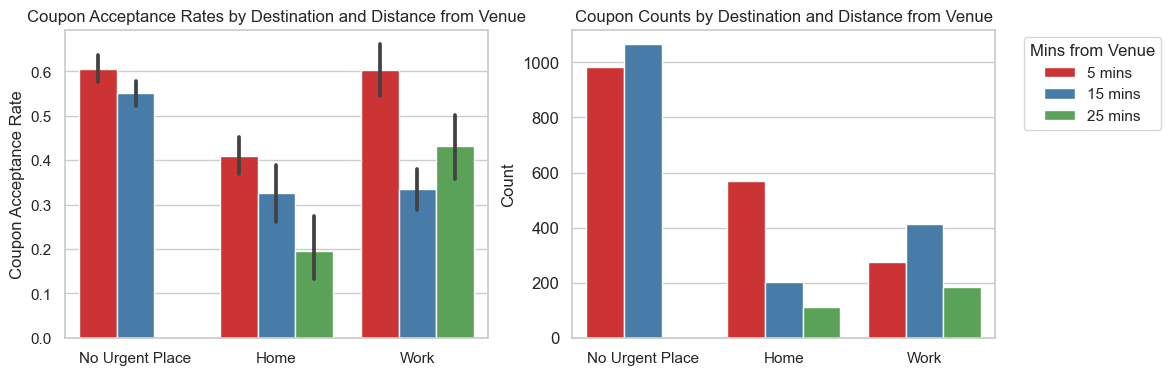

In [366]:
#Set Figure size
plt.figure(figsize=(12, 4))  

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#First subplot on row 1 (Countplot)
plt.subplot(1,2,1)
sns.barplot(data=df_coffee, x='destination',y='Y', hue='venueDistance', hue_order=distance_order, palette='Set1')
plt.title('Coupon Acceptance Rates by Destination and Distance from Venue')
plt.xlabel('')
plt.ylabel('Coupon Acceptance Rate')
plt.legend().remove() 

#Second subplot on row 1 (Barplot)    
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_coffee, x='destination', hue='venueDistance', hue_order=distance_order, palette='Set1')
plt.title('Coupon Counts by Destination and Distance from Venue')
plt.legend(title='Mins from Venue', labels=distance_order, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='y', labelsize=12) 
plt.xlabel('')
plt.ylabel('Count')

In [155]:
#Aggregate by destination and venueDistance
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_dest_dist_acceptance = (df_coffee.groupby(['destination', 'venueDistance'])['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_dest_dist_acceptance

,destination,venueDistance,acceptance_rate,coupon_count
3,No Urgent Place,5 mins,0.606307,983
6,Work,5 mins,0.602888,277
4,No Urgent Place,15 mins,0.550235,1065
8,Work,25 mins,0.432432,185
0,Home,5 mins,0.408772,570
7,Work,15 mins,0.334140,413
1,Home,15 mins,0.325123,203
2,Home,25 mins,0.194690,113


#### Answer 4
- We note that surprisingly, the acceptance rate for drivers going to work when the venue is 25 mins away is 0.43. This seems high.  One possible explanation is that even though the venue is  25 mins away, it is probably near the work place for these drivers

#### Question 5
- Plot the acceptance rate and count by destination and passengers and record any interesting observations

Text(0, 0.5, 'Count')

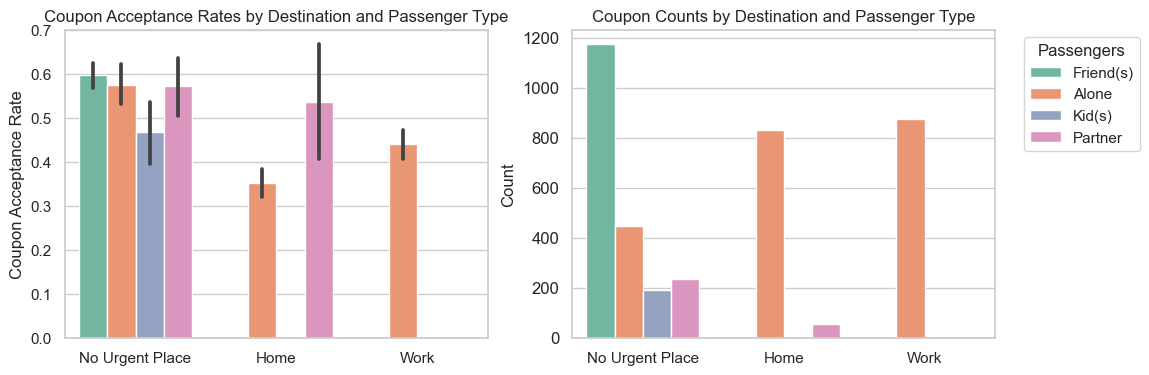

In [163]:
#Set Figure size
plt.figure(figsize=(12, 4))  

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#First subplot on row 1 (Barplot)
plt.subplot(1,2,1)
sns.barplot(data=df_coffee, x='destination',y='Y', hue='passanger', palette='Set2')
plt.title('Coupon Acceptance Rates by Destination and Passenger Type')
plt.xlabel('')
plt.ylabel('Coupon Acceptance Rate')
plt.legend().remove() 

#Second subplot on row 1 (Countplot)    
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_coffee, x='destination', hue='passanger',  palette='Set2')
plt.title('Coupon Counts by Destination and Passenger Type')
plt.legend(title='Passengers',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='y', labelsize=12) 
plt.xlabel('')
plt.ylabel('Count')

#### Answer 5
 - Among drivers going home, the acceptance rate is much higher when the partner is riding with the driver - altough we also note that the sample size is very small for drivers going home with their partner. 

#### Question 6 (Coupon Attribute)
- How does the expiration of the coupon imapct the acceptance rate? 

<Axes: xlabel='passanger-expiration', ylabel='destination'>

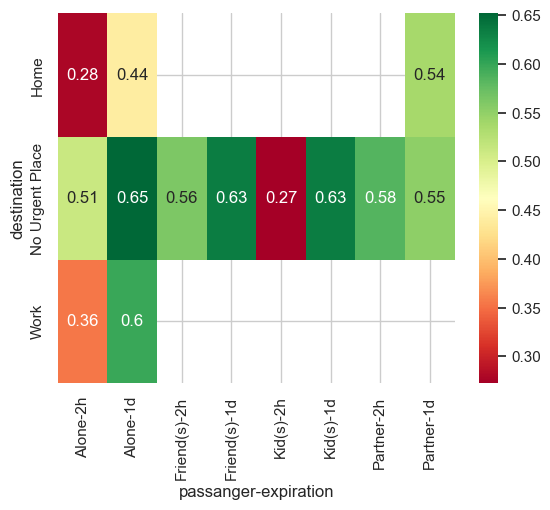

In [181]:
# Create a cross-tabulation with the average acceptance rate for each combination of destination, passenger and coupon expiration
crosstab_avg = pd.crosstab(index=df_coffee['destination'], columns=[df_coffee['passanger'], df_coffee['expiration']], 
                           values=df['Y'], aggfunc='mean')
crosstab_avg
sns.heatmap(crosstab_avg,  annot = True,
            cmap = "RdYlGn")

Text(0, 0.5, 'Count')

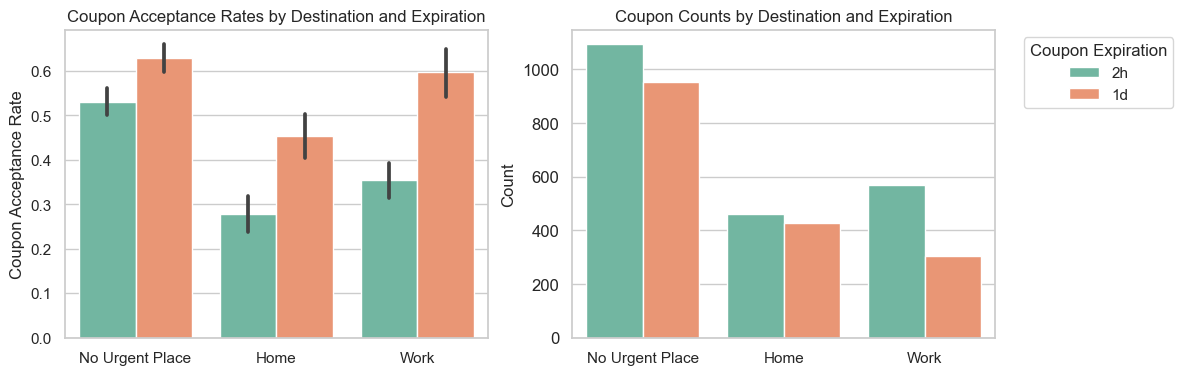

In [182]:
#Set Figure size
plt.figure(figsize=(12, 4))  

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#First subplot on row 1 (Barplot)
plt.subplot(1,2,1)
sns.barplot(data=df_coffee, x='destination',y='Y', hue='expiration', palette='Set2')
plt.title('Coupon Acceptance Rates by Destination and Expiration')
plt.xlabel('')
plt.ylabel('Coupon Acceptance Rate')
plt.legend().remove() 

#Second subplot on row 1 (Countplot)    
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df_coffee, x='destination', hue='expiration',  palette='Set2')
plt.title('Coupon Counts by Destination and Expiration')
plt.legend(title='Coupon Expiration',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='y', labelsize=12) 
plt.xlabel('')
plt.ylabel('Count')

In [185]:
#Aggregate by expiration time
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_exp_acceptance = (df_coffee.groupby(['expiration'])['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_exp_acceptance

,expiration,acceptance_rate,coupon_count
1,1d,0.579727,1687
0,2h,0.428841,2122


In [186]:
print(f"The overall ratio between acceptance rates for 1d coupons vs 2h coupons is "
      f"{df_exp_acceptance['acceptance_rate'].agg(ratio_of_largest_to_smallest):.2f}")

The overall ratio between acceptance rates for 1d coupons vs 2h coupons is 1.35


#### Answer 6
 - For all types of passengers except for partner, the acceptance rate for coupons that expire after 1 day is higher than the acceptance rate for coupons that expire after 2h
 - For all destination types, the acceptance rate for coupons that expire after 1 day is higher than the acceptance rate for coupons that expire after 2h
 - The overall ratio between acceptance rates for 1d coupons vs 2h coupons is 1.35

#### Question 7 
- Compare the acceptance rate of drivers going No Urgent Place at 10AM, are 5 mins away from venue while riding with kids or friends (group with highest acceptance rates from question 1) against all other drivers.  

In [368]:
# We are comparing acceptance rates for these two populations:
#group1: drivers going No Urgent Place at 10AM, are 5 mins away from venue while riding with kids or friends
group1_descr = 'Drivers going No Urgent Place at 10AM, are 5 mins away from venue while riding with kids or friends'    
group1 = df_coffee.query("destination=='No Urgent Place' and time=='10AM' and venueDistance=='5 mins' and \
passanger in ['Kid(s)', 'Friend(s)']")

#group2: All others is the same as saying the ones NOT in group 1
group2_descr= 'all others'
group2 = df_coffee[~df_coffee.index.isin(group1.index)]

compare_acceptance_rates(group1, group2, group1_descr, group2_descr)


The acceptance rate for Drivers going No Urgent Place at 10AM, are 5 mins away from venue while riding with kids or friends is 71.84%
The acceptance rate for all others is 48.29%

Drivers going No Urgent Place at 10AM, are 5 mins away from venue while riding with kids or friends are 1.49 more likely to accept the coupon than all others


#### Question 8 
- Plot countplots of contextual attributes and provide observations and insights from a marketing perspective

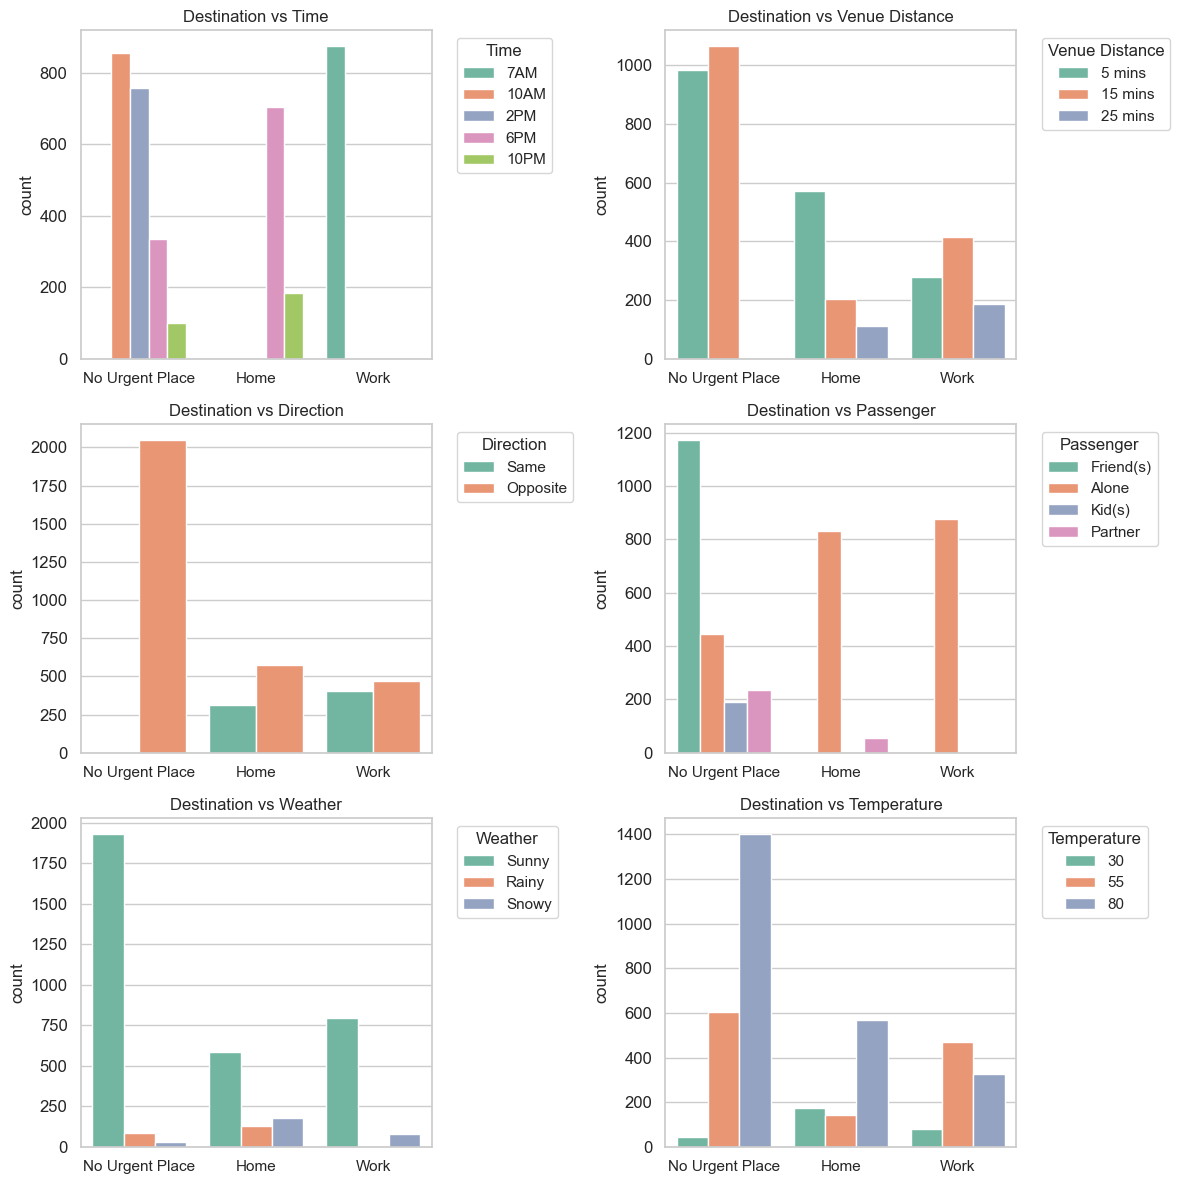

In [370]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1)

#Destination vs. Time
sns.countplot(x="destination", hue="time", hue_order=time_order, ax=axes[0, 0], palette="Set2", data=df_coffee)
axes[0, 0].set_title("Destination vs Time")
axes[0, 0].legend(title="Time", labels=time_order, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='y', labelsize=12)  
axes[0, 0].set_xlabel("") 


#Destination vs. Venue Distance
sns.countplot(x="destination", hue="venueDistance", hue_order=distance_order, ax=axes[0, 1], palette="Set2", data=df_coffee)
axes[0, 1].set_title("Destination vs Venue Distance")
axes[0, 1].legend(title="Venue Distance", labels=distance_order, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='y', labelsize=12)  
axes[0, 1].set_xlabel("")  # Remove x-axis label

#Destination vs. Direction
sns.countplot(x="destination", hue="direction", hue_order=['Same', 'Opposite'], ax=axes[1, 0], palette="Set2", data=df_coffee)
axes[1, 0].set_title("Destination vs Direction")
axes[1, 0].legend(title="Direction", labels=['Same','Opposite'], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].tick_params(axis='y', labelsize=12)  
axes[1, 0].set_xlabel("")  # Remove x-axis label

# Plot 4
sns.countplot(x="destination", hue="passanger", ax=axes[1, 1], palette="Set2", data=df_coffee)
axes[1, 1].set_title("Destination vs Passenger")
axes[1, 1].legend(title="Passenger", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].tick_params(axis='y', labelsize=12)  
axes[1, 1].set_xlabel("")  # Remove x-axis label

# Plot 5
sns.countplot(x="destination", hue="weather", ax=axes[2, 0], palette="Set2", data=df_coffee)
axes[2, 0].set_title("Destination vs Weather")
axes[2, 0].legend(title="Weather", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].tick_params(axis='y', labelsize=12)  
axes[2, 0].set_xlabel("")  # Remove x-axis label

# Plot 6
sns.countplot(x="destination", hue="temperature", ax=axes[2, 1], palette="Set2", data=df_coffee)
axes[2, 1].set_title("Destination vs Temperature")
axes[2, 1].legend(title="Temperature", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 1].tick_params(axis='y', labelsize=12)  
axes[2, 1].set_xlabel("")  # Remove x-axis label


# Adjust layout
plt.tight_layout()
plt.show()


#### Observations from countplots
The highest coupon counts are:
- Destination Vs. Time: No Urgent Place at 10AM and Work at 7AM 
- Destination Vs Venue Distance: No Urgent Place for 5 and 15 min drives to the venue
- Destination Vs. Direction:  No Urgent Place, opposite direction
- Destination Vs. Passengers: No Urgent Place with Friends
- Destination Vs. Weather: No Urgent Place, Sunny
- Destination Vs. Temperature: No Urgent Place 80 Degrees

The lowest coupon counts are: 
- Destination Vs. Time: 
   - Coupons were only given for work at 7am, home at 6pm and 10pm.  
   - Coupons were not given for No Urgent Place at 7am
- Destination Vs Venue Distance: No Urgent Place for 25 min drives
- Destination Vs. Direction:  No Urgent Place, same direction
- Destination Vs. Passengers: No coupons given for passsengers not riding alone for work 
    - That's probably because most commuters drive to work alone anyway
- Destination Vs. Weather: In general few coupons were given for rainy and snowy weather regardless of destination
- Destination Vs. Temperature: Few coupons given at 30 degrees for No Urgent Place but also not many given for other destinations either 

Additional Insights
- Most of the drivers going home do so at 6PM and most ride alone
- The lowest amount of coupons given for coffee is at 10PM
- Marketers of the coupons heavily targeted drivers going no urgent place
- They only gave out coupons for 25 min drives for those going home or to work. Perhaps marketers are targeting drivers who live or work near the venues that are 25 mins away.  We will look at acceptance rates and see if they are high
- They did not give any coupons for those going no urgent place and in the same direction because that would be like giving free money. 

#### Question 9 
- Plot bar plots of contextual attributes and provide observations and insights

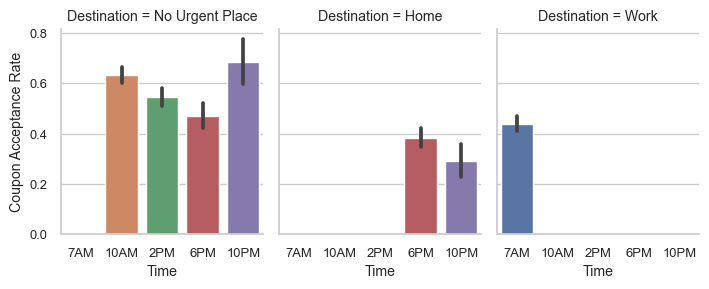

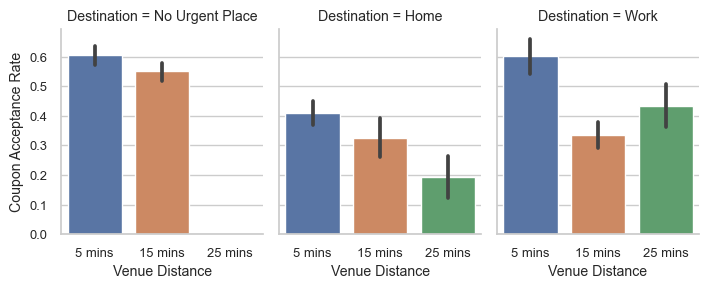

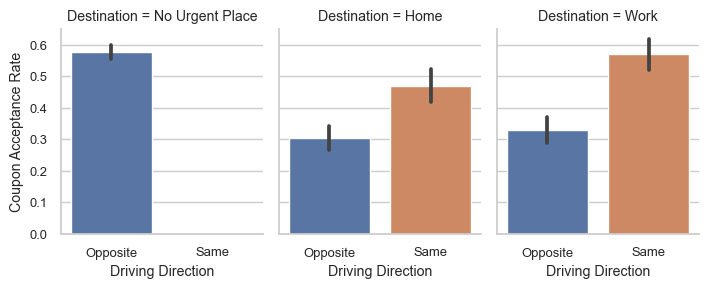

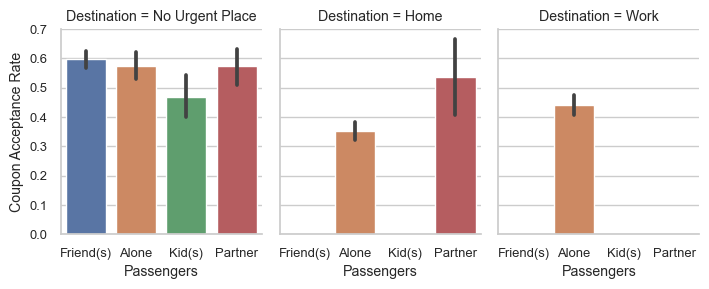

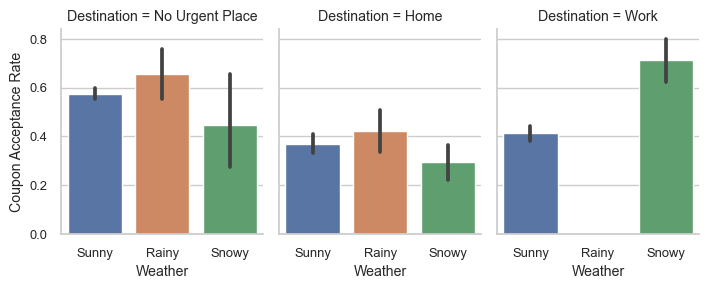

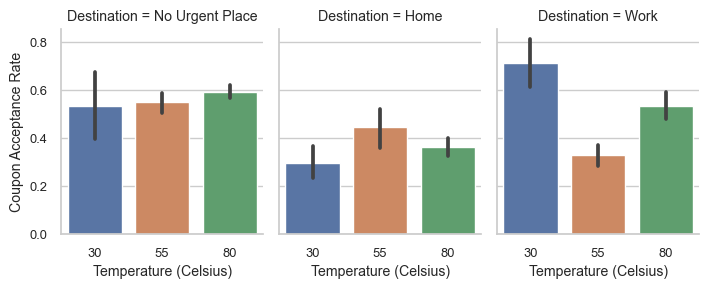

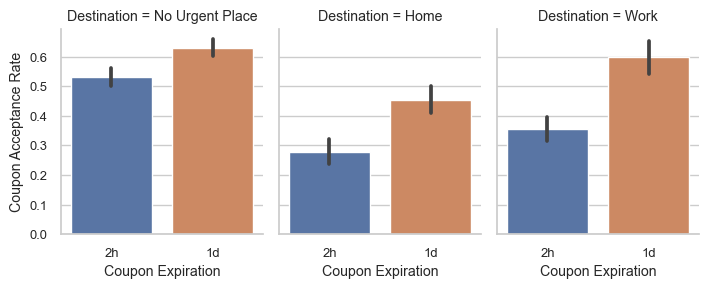

In [228]:
#Set grid style and font scale
sns.set(style="whitegrid", font_scale=0.85)

c1 = sns.catplot(
    data=df_coffee, x="time", order = time_order, y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c2 = sns.catplot(
    data=df_coffee, x="venueDistance", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c3 = sns.catplot(
    data=df_coffee, x="direction", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c4 = sns.catplot(
    data=df_coffee, x="passanger", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c5 = sns.catplot(
    data=df_coffee, x="weather", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c6 = sns.catplot(
    data=df_coffee, x="temperature", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)

c7 = sns.catplot(
    data=df_coffee, x="expiration", y="Y", col="destination",
    kind="bar", height=3, aspect=.8,
)
    
set_catplot_sp_title(c1, 'Destination')
set_catplot_sp_title(c2, 'Destination')
set_catplot_sp_title(c3, 'Destination')
set_catplot_sp_title(c4, 'Destination')
set_catplot_sp_title(c5, 'Destination')
set_catplot_sp_title(c6, 'Destination')
set_catplot_sp_title(c7, 'Destination')
    
c1.set_ylabels('Coupon Acceptance Rate')
c1.set_xlabels('Time')
c2.set_ylabels('Coupon Acceptance Rate')
c2.set_xlabels('Venue Distance')
c2.set_xticklabels(['5 mins', '15 mins', '25 mins'])
c3.set_ylabels('Coupon Acceptance Rate')
c3.set_xlabels('Driving Direction')
c4.set_ylabels('Coupon Acceptance Rate')
c4.set_xlabels('Passengers')
c5.set_ylabels('Coupon Acceptance Rate')
c5.set_xlabels('Weather')
c6.set_ylabels('Coupon Acceptance Rate')
c6.set_xlabels('Temperature (Celsius)')
c7.set_ylabels('Coupon Acceptance Rate')
c7.set_xlabels('Coupon Expiration')

#### Contextual attributes - Acceptance Rates Observations:
- Highest Acceptance Rates by Destination and Time: 
    - Surprisingly it is 10PM going to No Urgent Place despite low coupon count we saw from question 1
    - Secondly 10AM going to No Urgent Place

- Lowest Acceptance Rates by Destination and Time: 
     - 10PM and 6PM while going home
     - Going Home Alone
     - Have Kids and going home or to work
     - Going home and are within 25 miles from the venue
     - Going home or to work and are headed in the opposite direction
 - Notable impacts to the rates by Distance to the Venue
     - Drivers Going No Urgent Place accept ~55-60% of coupons for 5 and 15 min drives 
     - For drives 5 mins away, drivers going to work have similar acceptance rate as those going No Urgent Place
     - Going home, the more the travel time to venue the less likely drivers are to accept coupons
     - Going to work we surprisingly see an acceptance rate of over 40% for 25 min drives
     
 - Notable impacts to the rates by Direction
    - Acceptance rate is close to 60% for those going to No Urgent Place and needing to change direction 
    
 - Notable impacts to the rates by Passengers
    - Passengers with kids going No Urgent Place have a lower acceptance rate than all others 

 - Notable impacts from temperature and weather
    - Highest acceptance is rates is for snowy 30 degree weather while commuting to work
    - Weather and temperature are not big deterrents for drivers going No Urgent Place

 - Notable impacts to the rates by coupon expiration time
    - Acceptance rate are lowest for drivers going home
    - Acceptance rates for coupons expiring in 1 day tend to be higher than coupons expiring in 2h
  

     
**Additional Observations**: 
 - Most of the drivers going home do so at 6PM and most ride alone
 - The lowest amount of coupons given for coffee is at 10PM

#### Demographic Attributes Analysis

#### Question 10:  
 - For what combination of demographic attributes did drivers have the highest acceptance rate?
 - For what combination of demographic attributes did drivers have the lowest acceptance rate?
 - What is the ratio between both groups?

In [232]:
#Define list of contextual attributes
demo_attributes = ['gender', 'age','maritalStatus','has_children']

#Aggregate by all contextual attributes
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_demo_attribs_acceptance = (df_coffee.groupby(user_attributes)['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_demo_attribs_acceptance

,gender,age,maritalStatus,has_children,acceptance_rate,coupon_count
57,Female,41,Unmarried partner,1,1.000000,5
47,Female,36,Unmarried partner,1,1.000000,5
116,Male,31,Unmarried partner,0,1.000000,11
142,Male,46,Married partner,0,1.000000,4
107,Male,26,Unmarried partner,1,0.875000,8
...,...,...,...,...,...,...
64,Female,46,Single,0,0.281250,32
37,Female,31,Unmarried partner,1,0.166667,36
147,Male,46,Unmarried partner,1,0.142857,7
42,Female,36,Married partner,0,0.058824,17


In [371]:
print(f"Highest acceptance rate: {100*df_demo_attribs_acceptance['acceptance_rate'].iloc[0]:.2f}%")
print(f"Lowest acceptance rate: {100*df_demo_attribs_acceptance['acceptance_rate'].iloc[-1]:.2f}%")


print(f"The overall ratio of acceptance rates between both groups is "
      f"{df_demo_attribs_acceptance['acceptance_rate'].agg(ratio_of_largest_to_smallest)}")

Highest acceptance rate: 100.00%
Lowest acceptance rate: 0.00%
The overall ratio of acceptance rates between both groups is undefined since smallest ratio is 0


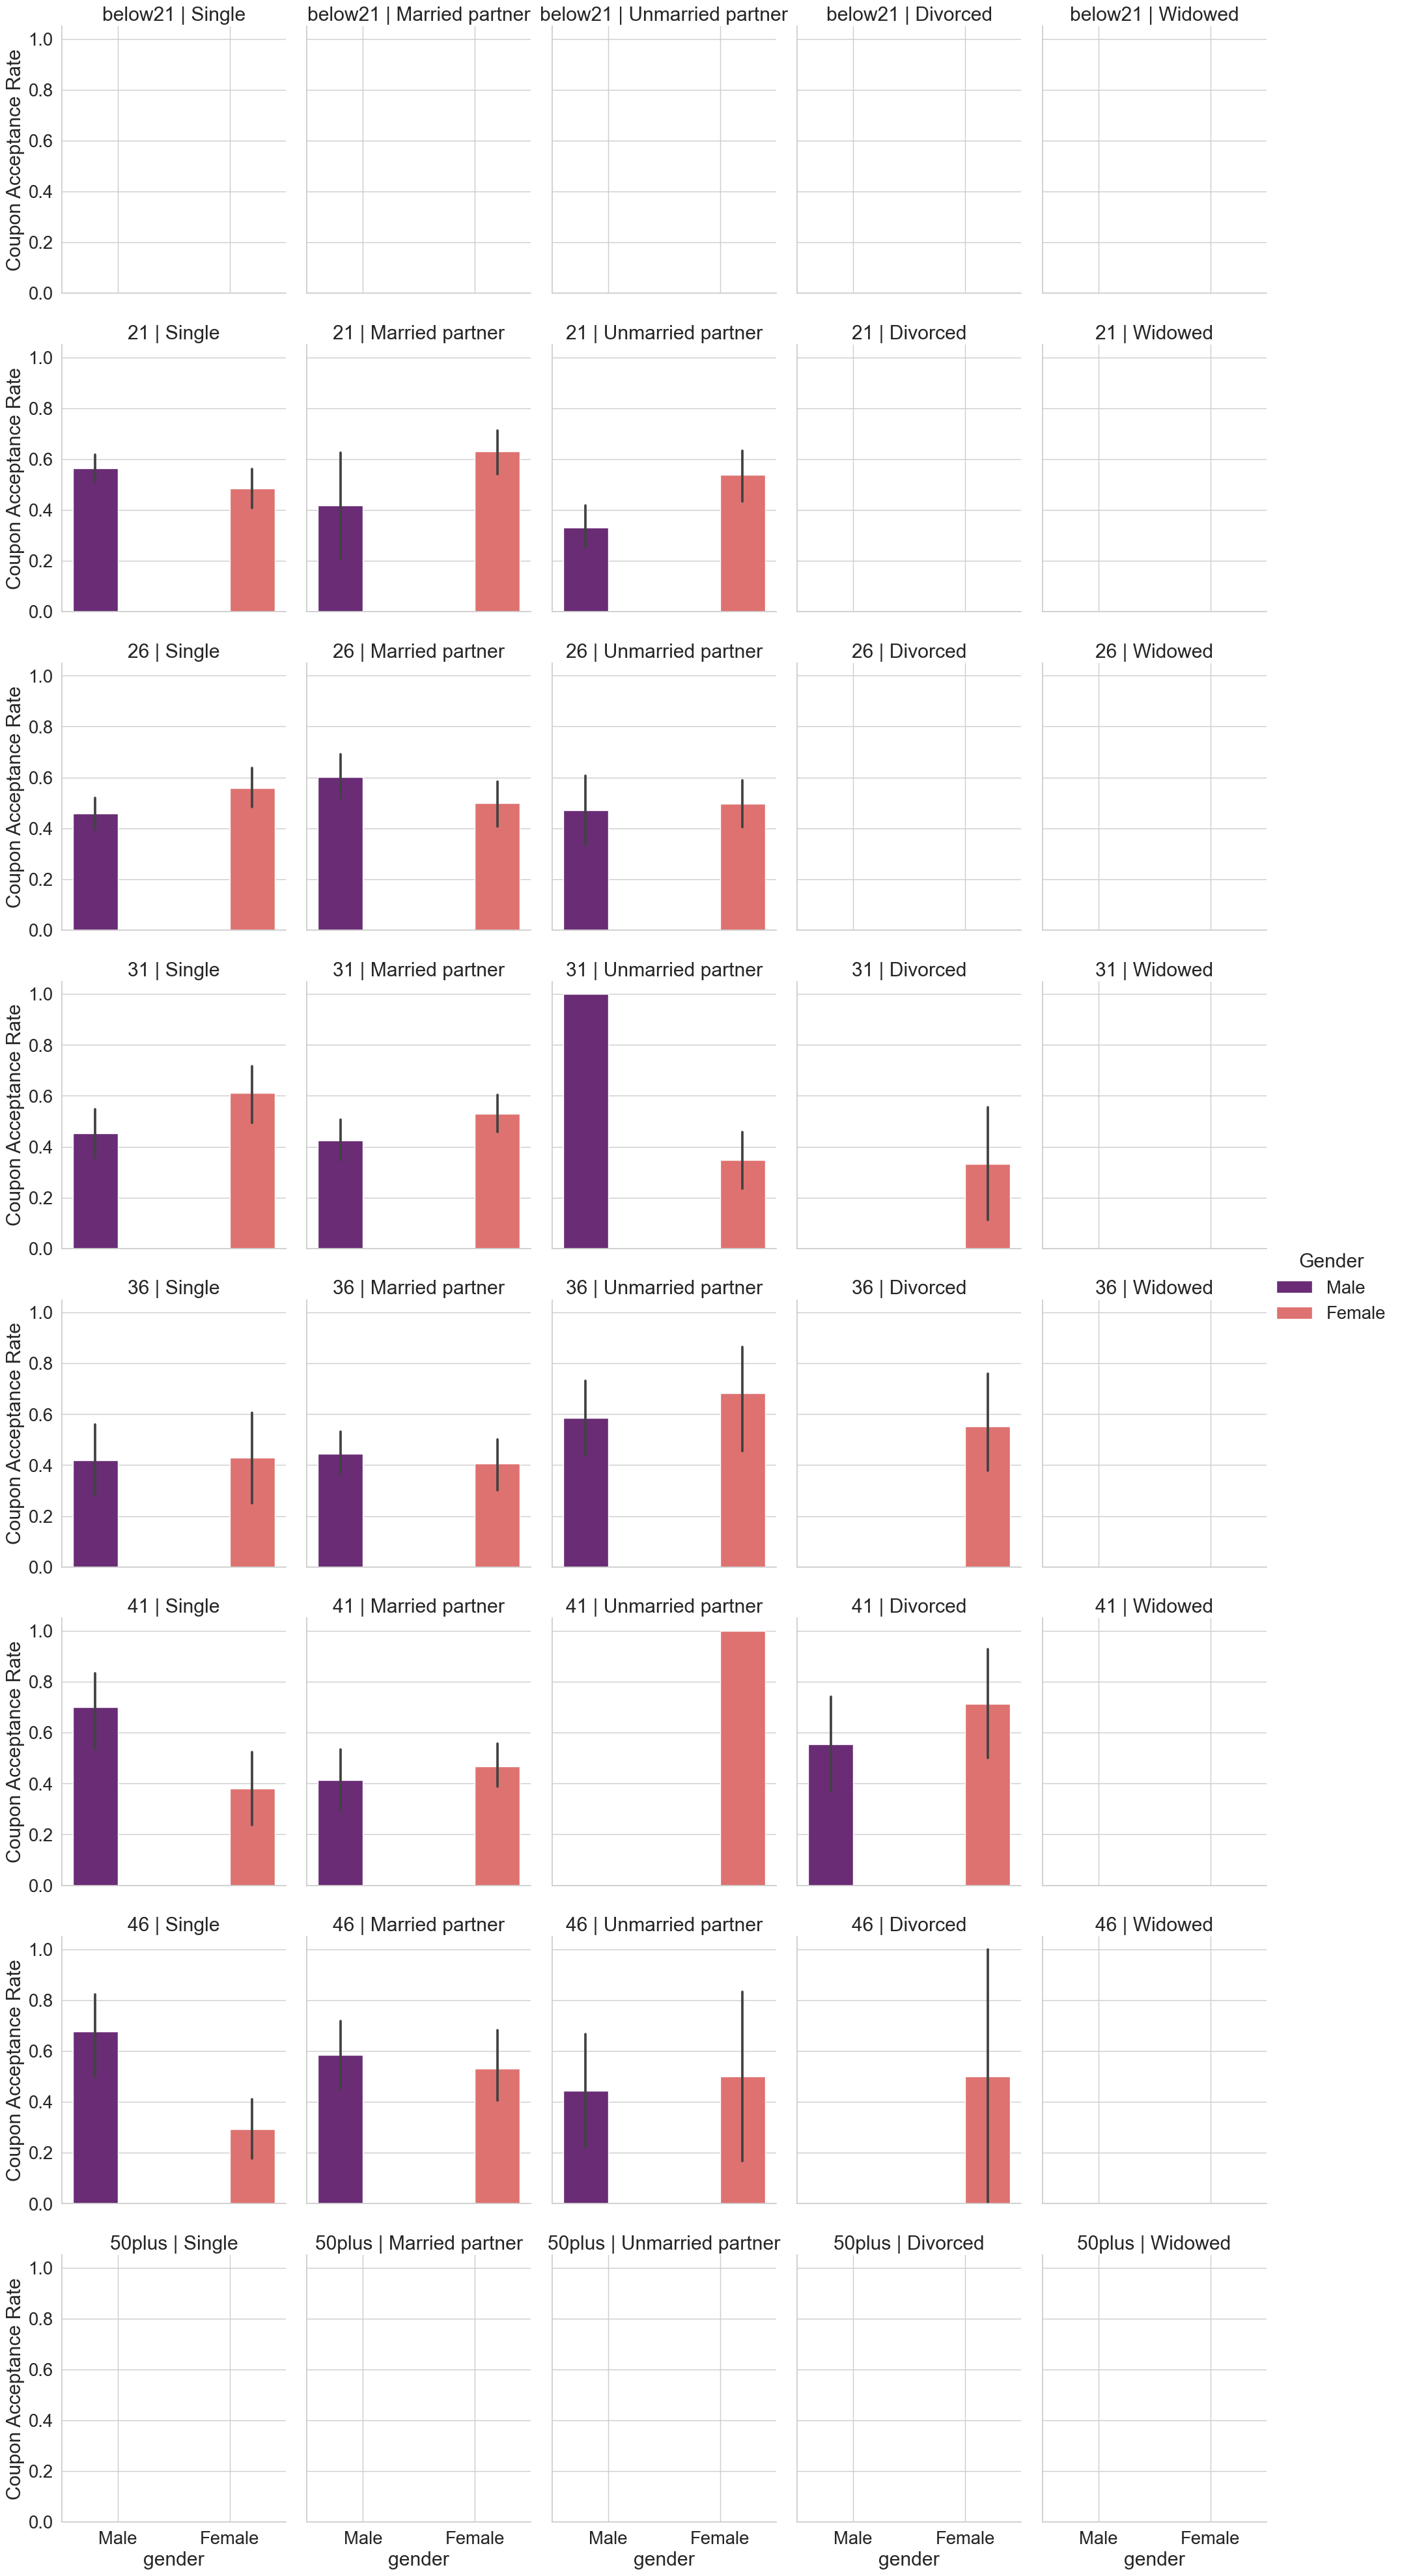

In [270]:
#Set grid style and font scale
sns.set(style="whitegrid", font_scale=1.8)

demographics = sns.catplot(
    data=df_coffee, x="gender", y="Y", col="maritalStatus", hue='gender', row="age", palette='magma',
    kind="bar", height=5, aspect=0.8,
)

#set_catplot_sp_title(demographics, 'Marital')

# only show values
demographics.set_titles(row_template="{row_name}", col_template="{col_name}")

    
demographics.set_ylabels('Coupon Acceptance Rate')

# Set x-axis labels
demographics.add_legend(title="Gender", label_order=df_coffee['gender'].unique())

# Explicitly set xtick labels for all subplots
#demographics.set_xlabels('Gender')
#gender_labels = df_coffee['gender'].unique()  # Replace with the actual unique gender labels if necessary
#for ax in demographics.axes.flat:
#    ax.set_xticklabels(gender_labels, visible=True)

#### Answer 10:  
 - The highest acceptance rates (100%) are found among:
     - Females of ages 36 and 41 that are unmarried partners with children
     - Males of age 31 that are unmarried partners with no children
     - Males of age 46 that are married with no chlidren 
 - The lowest acceptance rates (0%) are found among:
     - Females of age 21 that are unmarried partners with children 
 - What is the ratio between both groups?
     - Undefined since we cannot divide by 0
     
We note that no coupons are distributed to drivers below 21 or above 50

#### Question 11
- For what combination of education and occupation did drivers have the highest acceptance rate?
- For what combination of education and occupation did drivers have the lowest acceptance rate?

<Axes: xlabel='occupation', ylabel='education'>

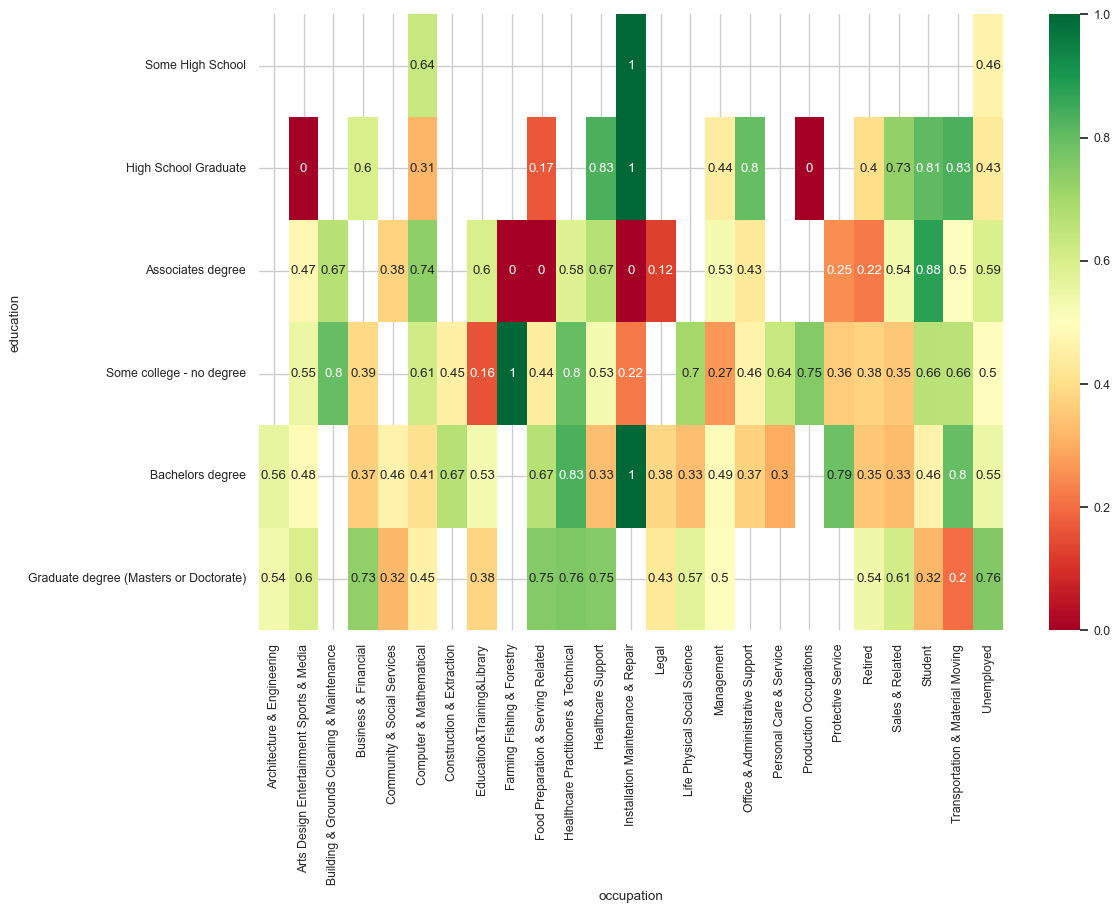

In [276]:
#Set grid style and font scale
sns.set(style="whitegrid", font_scale=0.8)

plt.figure(figsize=(12,8))

# Create a cross-tabulation with the average acceptance rate for education vs. occupation
crosstab_avg = pd.crosstab(index=df_coffee['education'], columns=[df_coffee['occupation']], 
                           values=df['Y'], aggfunc='mean')
crosstab_avg
sns.heatmap(crosstab_avg,  annot = True,
            cmap = "RdYlGn")

#### Answer 11
- Highest (100%) acceptance rates are found among:
    - Drivers with some college/no degree who work in Farming, Fishing and Forestry
    - Drivers with a Bachelor, or a high school degree or some high school that work in Installation Maintenance & Repair
- Lowest (0%) acceptance rates are found among:
    - High School graduates in Arts Design Entertainment Sports & Media and Production Occupations
    - Associates degree students in Farmish, Fishing and Forestry, Food Preparation & Serving Related as well as Installation Maintenance & Repair

####  Question 12
- Analysze the lifestyle attributes (frequency of going out to different establishments) and plot graphs as needed

In [283]:
#Define list of contextual attributes
lifestyle_attributes = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

#Aggregate by all contextual attributes
#Compute the mean and the sum
#Reset the indext and sort by the mean
#Filter out categories where no coupons were distributed
#Rename mean and count columns
df_lifestyle_attribs_acceptance = (df_coffee.groupby(lifestyle_attributes)['Y'] 
                            .agg(['mean', 'count']) 
                            .reset_index() 
                            .sort_values(by='mean', ascending=False)
                            .query('count > 0')
                            .rename(columns={'mean': 'acceptance_rate', 'count': 'coupon_count'})
                           )
df_lifestyle_attribs_acceptance

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,acceptance_rate,coupon_count
2180,less1,1~3,1~3,less1,never,1.0,10
2587,never,never,4~8,1~3,1~3,1.0,4
2836,never,1~3,4~8,1~3,less1,1.0,15
366,1~3,1~3,gt8,4~8,less1,1.0,5
374,1~3,1~3,gt8,gt8,gt8,1.0,10
...,...,...,...,...,...,...,...
1971,less1,never,4~8,gt8,less1,0.0,11
1965,less1,never,4~8,4~8,never,0.0,11
1956,less1,never,4~8,less1,less1,0.0,7
1955,less1,never,4~8,less1,never,0.0,8


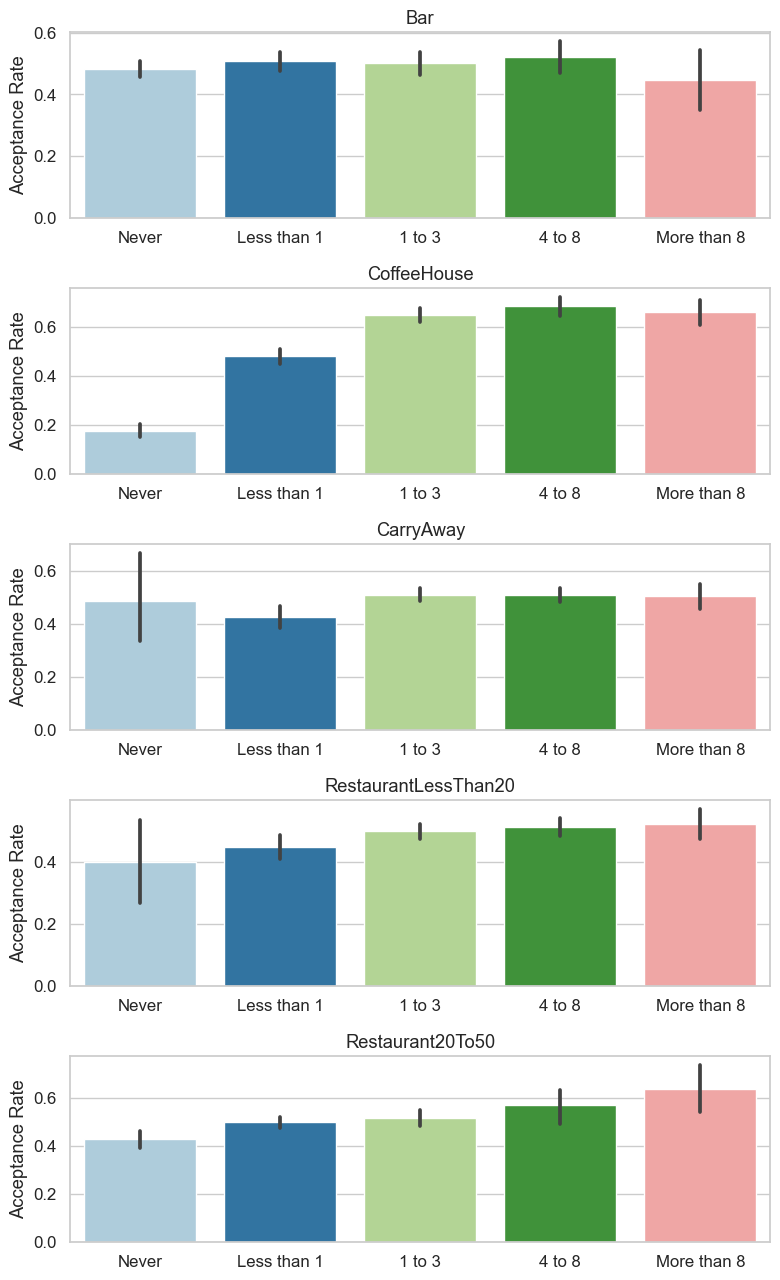

In [372]:
# Set grid style and font scale
sns.set(style="whitegrid", font_scale=1.1)

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 13))

# Define the order for x-axis categories
outing_order = ['never', 'less1', '1~3', '4~8', 'gt8']

# Define the labels for x-axis categories
xticklabels = ['Never', 'Less than 1', '1 to 3', '4 to 8', 'More than 8']

# Loop over the list of establishment types
for ax, i in zip(axs, lifestyle_attributes):
    sns.barplot(data=df_coffee, x=i, y='Y', order=outing_order, ax=ax, palette='Paired')
    ax.set_title(i)
    ax.set_xlabel('')
    ax.set_ylabel('Acceptance Rate')
    ax.set_xticklabels(labels=xticklabels, rotation=0)

#Adjust layout to add padding between rows
plt.subplots_adjust(hspace=0.5)  # Adjust the horizontal space between subplots


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Answer 12 - Observations for lifestyle attributes
- The main thing that stands out from the plots above is that regarding the going out habits, those who never go to the coffee house have the lowest acceptance rate for the coffee coupons. This makes sense.  

#### Question 13 
- Plot countplots and bar plots of the occupation, education and income and list your observations

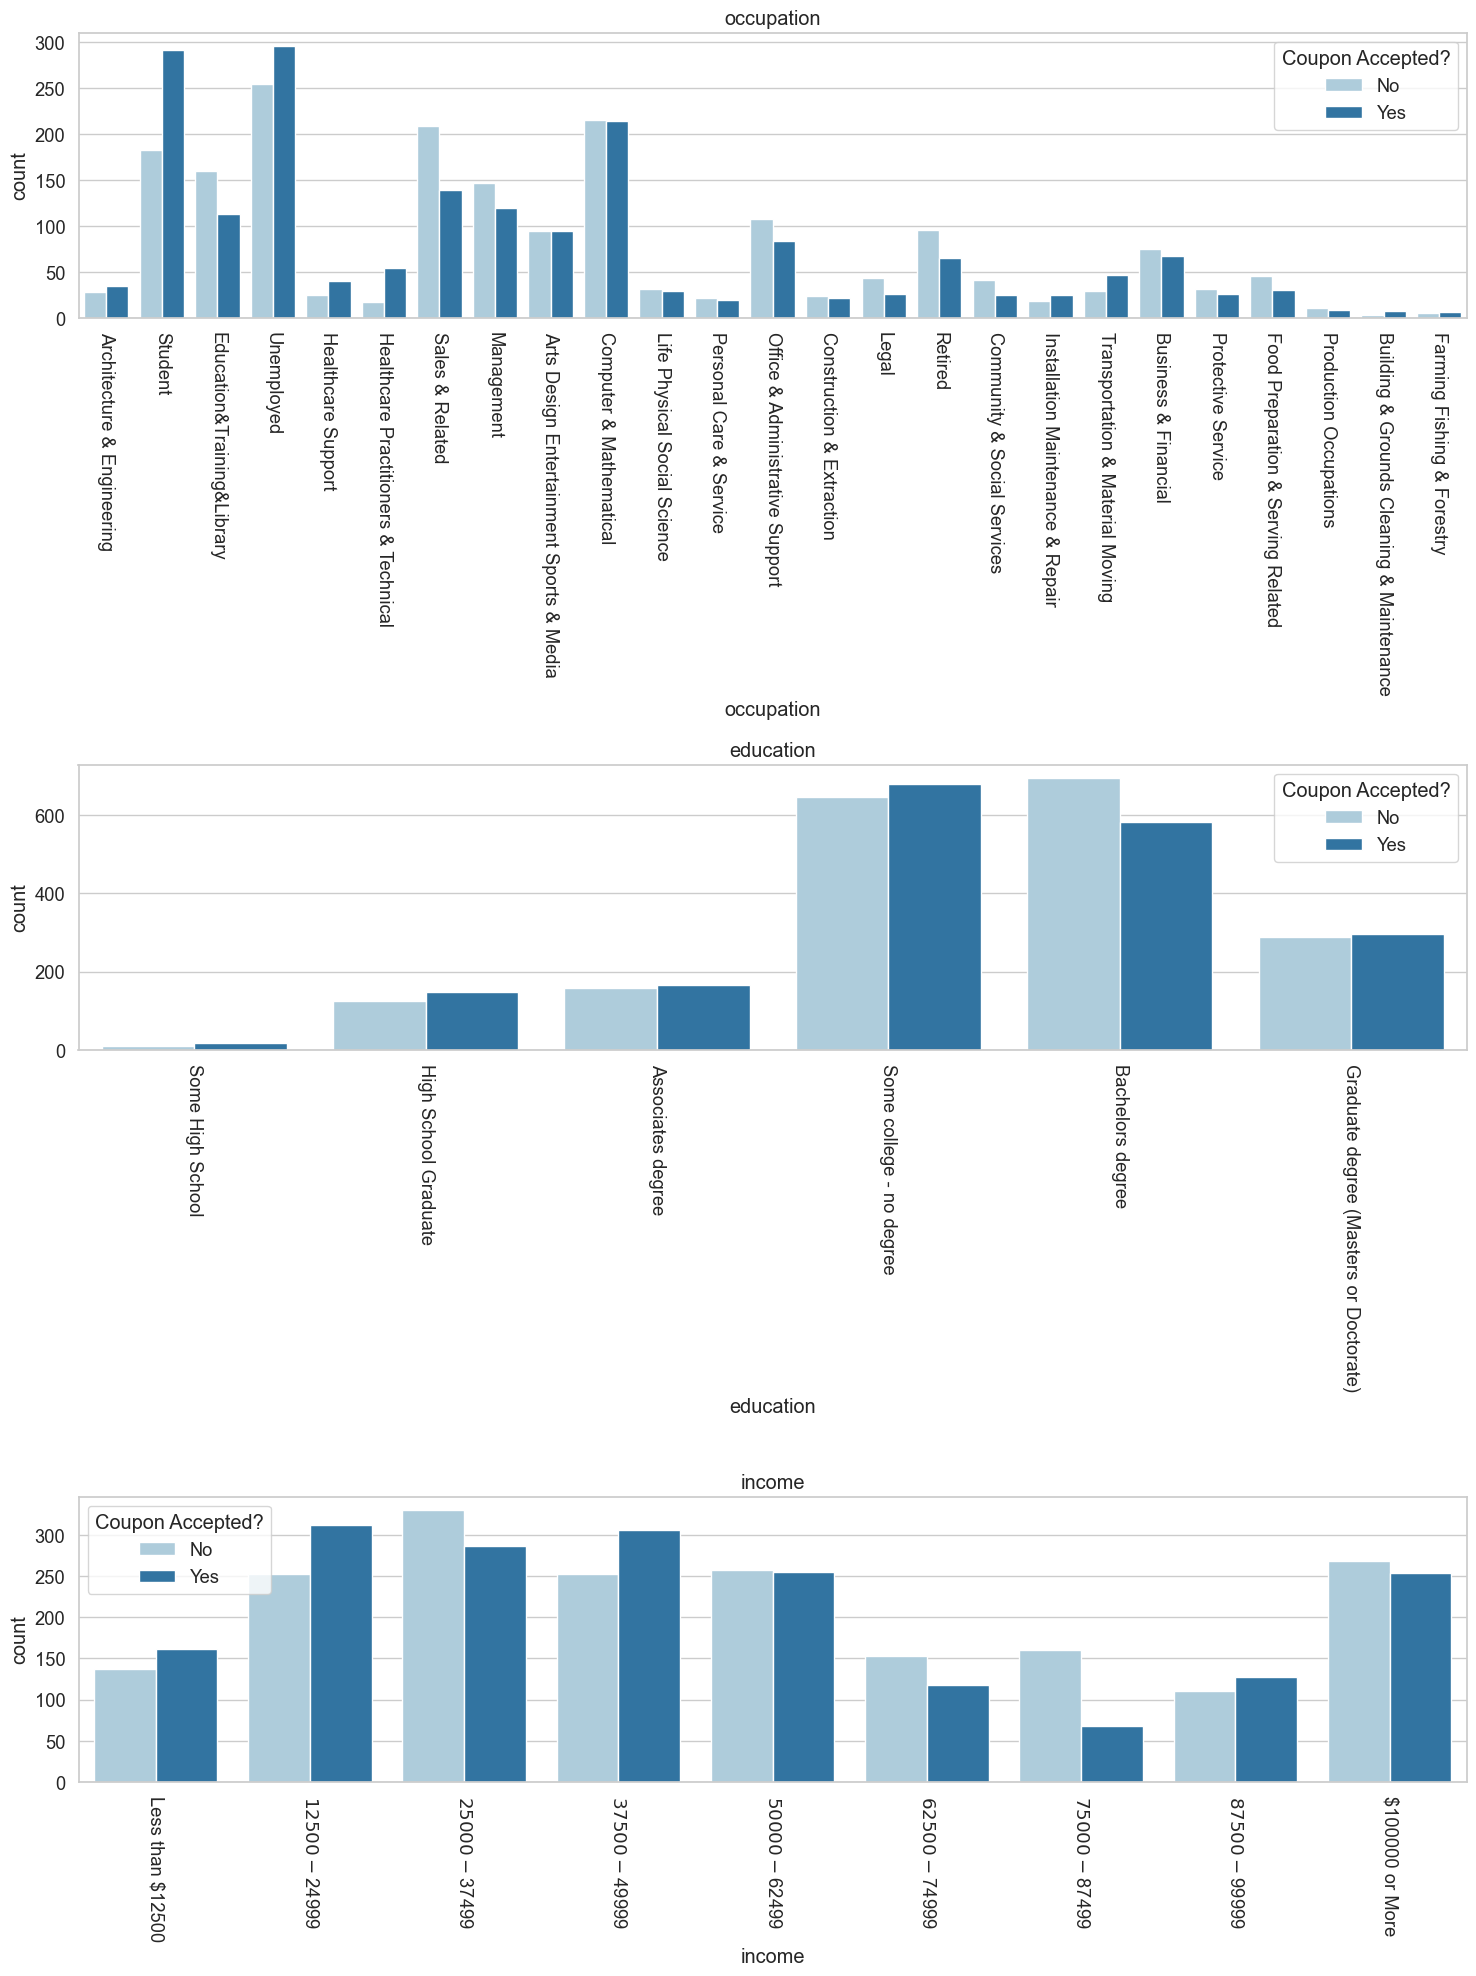

In [373]:
sns.set(style="whitegrid", font_scale=1.2)

# Create countplots for the specified columns
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
df_coffee['income'] = pd.Categorical(df_coffee['income'], categories=income_order, ordered=True)

education_order=['Some High School', 'High School Graduate', 'Associates degree',
                 'Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
df_coffee['education'] = pd.Categorical(df_coffee['education'], categories=education_order, ordered=True)

sns.countplot(data=df_coffee, x='occupation', hue='Y', ax=axs[0], hue_order=[0,1], palette='Paired', dodge=True)
axs[0].set_title('occupation')
axs[0].legend(title='Coupon Accepted?', labels=['No', 'Yes'])
axs[0].tick_params(axis='x', rotation=-90)

sns.countplot(data=df_coffee, x='education', hue='Y', ax=axs[1], hue_order=[0,1], palette='Paired', dodge=True)
axs[1].set_title('education')
axs[1].legend(title='Coupon Accepted?', labels=['No', 'Yes'])
axs[1].tick_params(axis='x', rotation=-90)

sns.countplot(data=df_coffee, x='income', hue='Y', ax=axs[2], hue_order=[0,1], palette='Paired', dodge=True)
axs[2].set_title('income')
axs[2].legend(title='Coupon Accepted?', labels=['No', 'Yes'])
axs[2].tick_params(axis='x', rotation=-90)

plt.tight_layout()
plt.show()

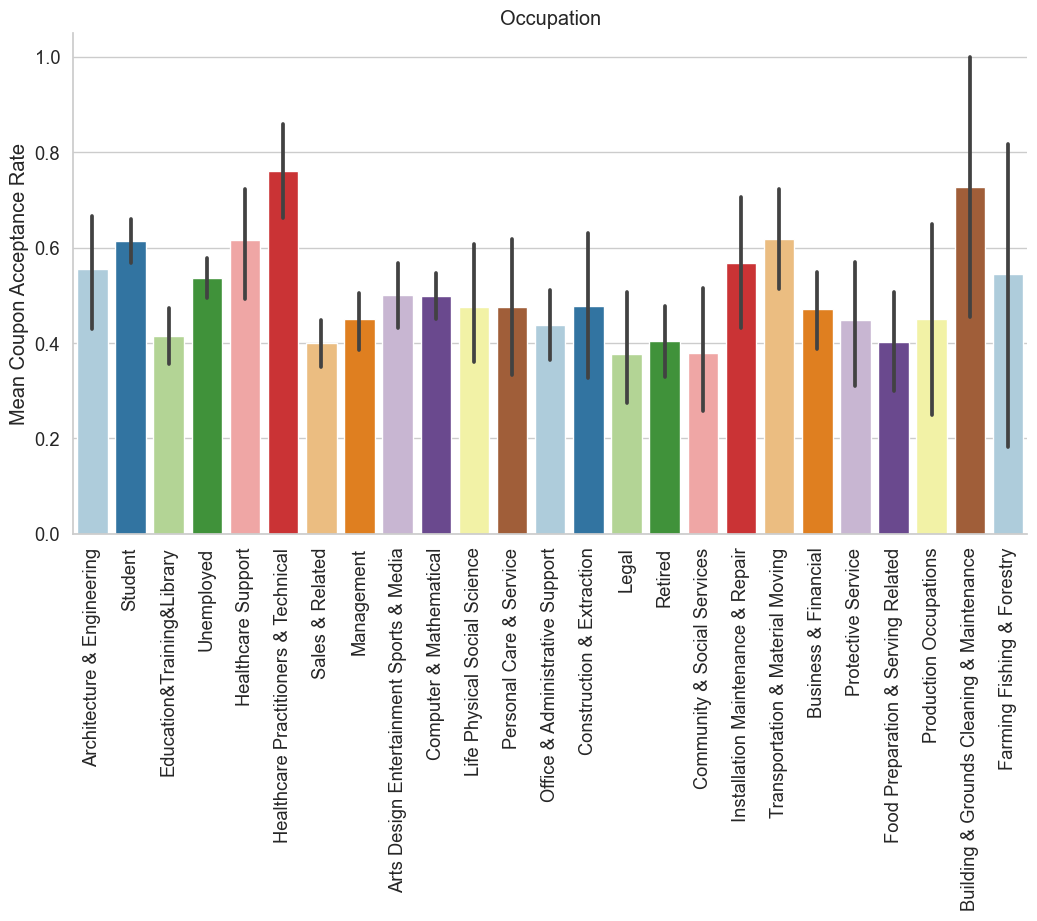

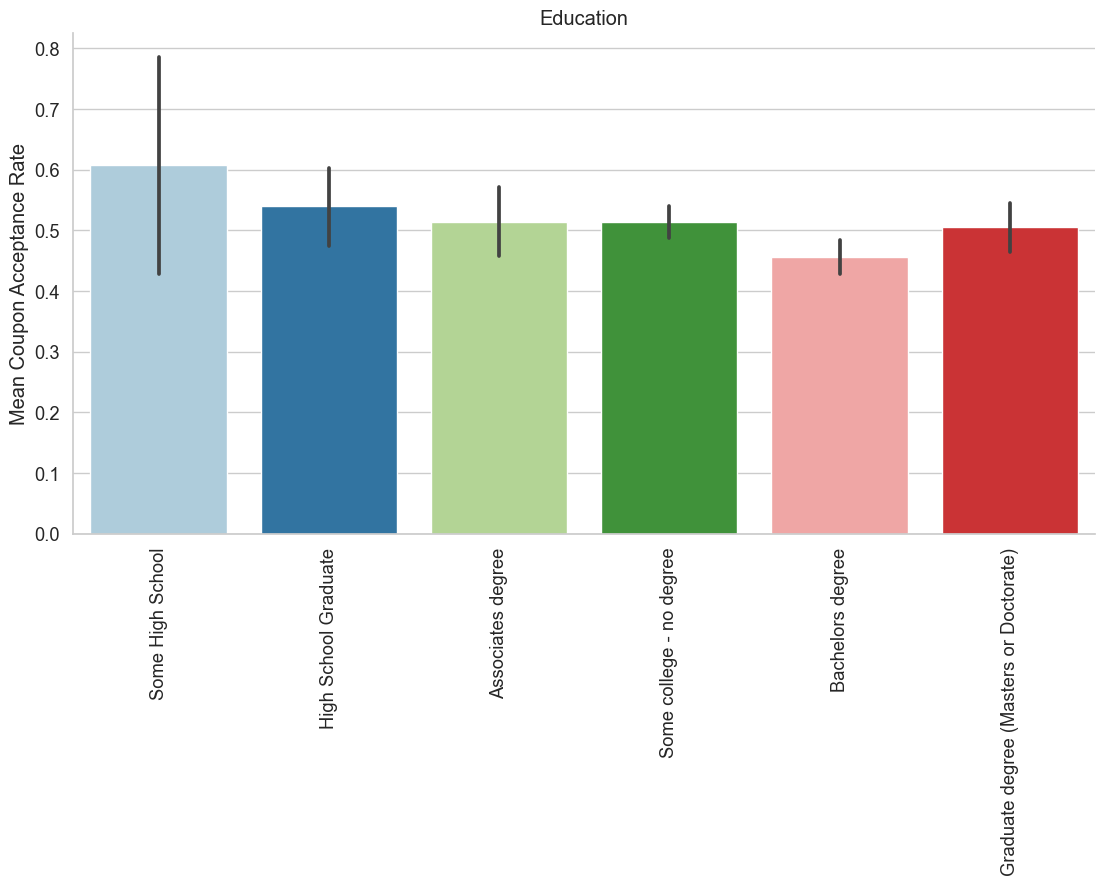

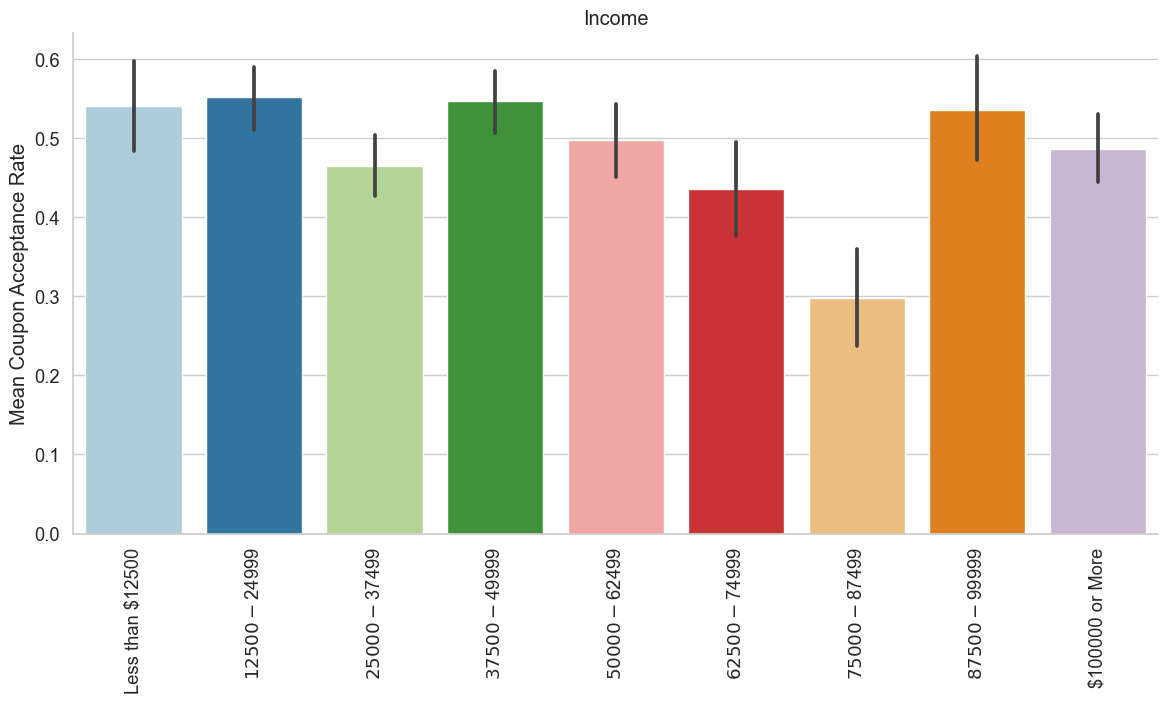

In [290]:
# Set grid style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Specify income and education order
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
df_coffee['income'] = pd.Categorical(df_coffee['income'], categories=income_order, ordered=True)

education_order = ['Some High School', 'High School Graduate', 'Associates degree',
                   'Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
df_coffee['education'] = pd.Categorical(df_coffee['education'], categories=education_order, ordered=True)

# Create catplots
# Set grid style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create catplots with means
g1 = sns.catplot(data=df_coffee, x='occupation', y='Y', kind='bar', height=6, aspect=2, 
                 palette='Paired').set(title='Occupation', xlabel='', ylabel='Mean Coupon Acceptance Rate')
g1.set_xticklabels(rotation=90)

g2 = sns.catplot(data=df_coffee, x='education', y='Y', kind='bar', height=6, aspect=2, 
                 palette='Paired').set(title='Education', xlabel='', ylabel='Mean Coupon Acceptance Rate')
g2.set_xticklabels(rotation=90)

g3 = sns.catplot(data=df_coffee, x='income', y='Y', kind='bar', height=6, aspect=2, 
                 palette='Paired').set(title='Income', xlabel='', ylabel='Mean Coupon Acceptance Rate')
g3.set_xticklabels(rotation=90)


#### Answer 13 -  Observations on education, income and occupation

The highest acceptance rates are for: 

- occupation: 
  - healthcare practicioners (perhaps working late shifts)
- education: 
  - Some High School 
- income: 
  - Again we find some of the highest accetpance rates among lower income drivers

#### Question 14
Compare acceptance rate of drivers who make less than 25k and are students or unemployed vs. all others

In [374]:
#Group1: Make 25k or less and are students or unemployed 
group1_descr = 'drivers who make 25k or less and are students or unemployed'
group1 = df_coffee.query("income in['Less than $12500', '$12500 - $24999'] and occupation in['Student', 'Unemployed']")

#Group2: All others
#Group2: All others is the same as saying the ones NOT in group 1
group2_descr= 'all others'
group2 = df_coffee[~df_coffee.index.isin(group1.index)]

compare_acceptance_rates(group1, group2, group1_descr, group2_descr)


The acceptance rate for drivers who make 25k or less and are students or unemployed is 58.68%
The acceptance rate for all others is 48.56%

drivers who make 25k or less and are students or unemployed are 1.21 more likely to accept the coupon than all others


#### Additional General Observation
We already saw that when coupon = Coffee House the overall acceptance rate is around 50% vs. 56.76% for all coupon types combined.  This is interesting because it may indicate that the price of coffee is low enough that overall people are less incentivized to accept a coupon.  

### Next Steps
- There are many combinations of features for which drivers did not receive coupons or had very few coupons distributed.  We would recommend distributing additional coupons to cover all combinations of attributes so that a full representative analysis can be performed. 
- Compare acceptance rates by looking at additional combinations of features